<h1>The Geometry of Option Pricing: An Intuitive and Visual Guide</h1>



The article links

Medium: 

LinkedIn: 

<h3>1.    The definition of European options (calls and puts) and their payoff structures.</h3>

____
Graphs or animations
____

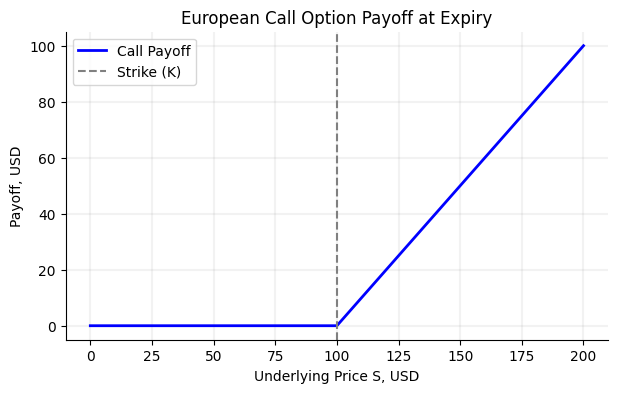

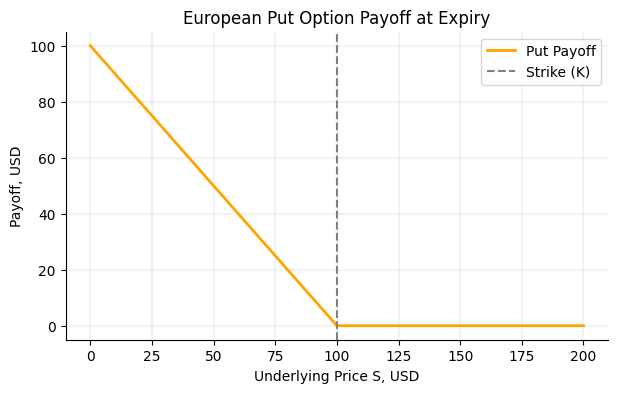

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Parameters ---
K = 100.0                            # Strike price
S = np.linspace(0, 2*K, 500)         # Possible underlying prices at expiry

# --- Payoffs at expiry ---
call_payoff = np.maximum(S - K, 0)   # Call option payoff
put_payoff  = np.maximum(K - S, 0)   # Put option payoff


# ============================================================
# --- Plot Call Payoff and Save ---
# ============================================================
fig, ax = plt.subplots(figsize=(7, 4))
fig.patch.set_facecolor("#ffffffff")        # light background
ax.set_facecolor("#ffffffff")

ax.plot(S, call_payoff, label='Call Payoff', color='blue', linewidth=2)
ax.axvline(K, color='grey', linestyle='--', label='Strike (K)')

ax.set_title('European Call Option Payoff at Expiry')
ax.set_xlabel('Underlying Price S, USD')
ax.set_ylabel('Payoff, USD')

# Custom grid + cleanup
ax.grid(True, color="grey", linewidth=1.5, linestyle='-', alpha=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

# --- Save as PNG ---
fig.savefig("figures/1_call_payoff.png", dpi=300, bbox_inches="tight", transparent=False)

plt.show()


# ============================================================
# --- Plot Put Payoff and Save ---
# ============================================================
fig, ax = plt.subplots(figsize=(7, 4))
fig.patch.set_facecolor("#ffffffff")
ax.set_facecolor("#ffffffff")

ax.plot(S, put_payoff, label='Put Payoff', color='orange', linewidth=2)
ax.axvline(K, color='grey', linestyle='--', label='Strike (K)')

ax.set_title('European Put Option Payoff at Expiry')
ax.set_xlabel('Underlying Price S, USD')
ax.set_ylabel('Payoff, USD')

# Custom grid + cleanup
ax.grid(True, color="grey", linewidth=1.5, linestyle='-', alpha=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

# --- Save as PNG ---
fig.savefig("figures/2_put_payoff.png", dpi=300, bbox_inches="tight", transparent=False)

plt.show()

____
Formulas
____

In [114]:
import os
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Configure where to save and how to name files
# ---------------------------------------------------
output_dir = "formulas"         
file_prefix = "1_formula_"      

os.makedirs(output_dir, exist_ok=True)

# ---------------------------------------------------
# 2. LaTeX formulas here
# ---------------------------------------------------
formulas = [
    r"\text{Call payoff: } \max(S_T - K, 0), \quad \text{Put payoff: } \max(K - S_T, 0)"
]

# ---------------------------------------------------
# 3. Loop over formulas and save each as PNG
# ---------------------------------------------------
for i, formula in enumerate(formulas, start=1):
    fig, ax = plt.subplots(figsize=(6, 0.1))  # adjust size as you like

    ax.axis("off")

    # Wrap the formula with $...$ so matplotlib treats it as math
    ax.text(
        0.5, 0.5,
        f"${formula}$",
        ha="center",
        va="center",
        fontsize=24,
    )

    filename = f"{file_prefix}{i}.png"
    filepath = os.path.join(output_dir, filename)

    fig.savefig(
        filepath,
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.2,
        transparent=True,   # nice for Medium on white/colored backgrounds
    )
    plt.close(fig)

    print(f"Saved: {filepath}")

Saved: formulas/1_formula_1.png


<h3>2.    The fundamental challenge of pricing derivatives before expiration.</h3>

____
Graphs or animations
____

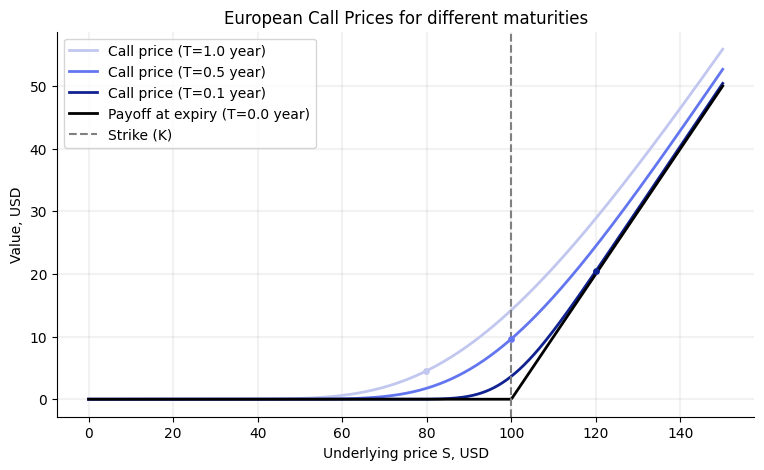

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt, exp
from statistics import NormalDist

# --- Parameters ---
K = 100.0
r = 0.05
sigma = 0.30
maturities = [1.0, 0.5, 1.0/12.0]
colors = ["#c1c7efff", "#6376efff", "#112291ff"]

S = np.linspace(1e-6, 1.5*K, 600)

# --- Helpers ---
N = NormalDist()  # for CDF

def bs_call_price(S_vals, K, r, sigma, T):
    if T <= 0:
        return np.maximum(S_vals - K, 0.0)
    sqrtT = sqrt(T)
    # vectorized using numpy ops but math functions for scalars, so use np versions:
    d1 = (np.log(S_vals / K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrtT)
    d2 = d1 - sigma * sqrtT
    # NormalDist.cdf is scalar; vectorize:
    cdf = np.vectorize(N.cdf)
    return S_vals * cdf(d1) - K * np.exp(-r * T) * cdf(d2)

# --- Compute ---
payoff = np.maximum(S - K, 0.0)
# (T0, C0), (T1, C1), (T2, C2)  curves
curves = [(T, bs_call_price(S, K, r, sigma, T)) for T in maturities]

# --- Plot ---
fig, ax = plt.subplots(figsize=(9, 5))
for (T, C), color in  zip(curves, colors):
    ax.plot(S, C, color=color, linewidth=2, label=f'Call price (T={T:.1f} year)')

Smin, Smax = S[0], S[-1]
N = len(S)

def idx_from_value(s0):
    j = round((s0 - Smin) / (Smax - Smin) * (N - 1))
    return int(np.clip(j, 0, N-1))

for (T, C), color, s0 in zip(curves, colors, [80, 100, 120]):
    j = idx_from_value(s0)
    ax.scatter(S[j], C[j], s=15, color=color, zorder=10)

    
ax.plot(S, payoff, color='black', linewidth=2, label='Payoff at expiry (T=0.0 year)')
ax.axvline(K, color='grey', linestyle='--', label='Strike (K)')

ax.set_title('European Call Prices for different maturities')
ax.set_xlabel('Underlying price S, USD')
ax.set_ylabel('Value, USD')
ax.grid(True, color="grey", linewidth=1.5, linestyle='-', alpha=0.1)
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Save as PNG ---
fig.savefig("figures/2_european_call_prices_for_different_maturities.png", dpi=300, bbox_inches="tight", transparent=False)

plt.show()


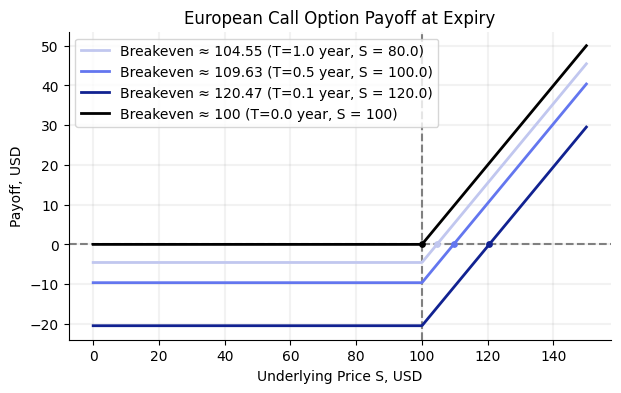

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import NormalDist
from math import log, sqrt, exp

# --- Parameters ---
K = 100.0                            # Strike price
S = np.linspace(0, 1.5*K, 500)         # Possible underlying prices at expiry
r = 0.05
sigma = 0.30
maturities = [1.0, 0.5, 1.0/12.0]
pricesOfUnderlyingChosen = [80, 100, 120]


def bs_call_price(S_vals, K, r, sigma, T):
    S_vals = np.asarray(S_vals, dtype=float)

    if T <= 0:
        return np.maximum(S_vals - K, 0.0)
    sqrtT = sqrt(T)
    # vectorized using numpy ops but math functions for scalars, so use np versions:
    d1 = (np.log(S_vals / K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrtT)
    d2 = d1 - sigma * sqrtT
    # NormalDist.cdf 
    cdf = np.vectorize(NormalDist().cdf)
    return S_vals * cdf(d1) - K * np.exp(-r * T) * cdf(d2)

# --- Payoffs at expiry ---
call_payoff = np.maximum(S - K, 0)   # Call option payoff
# --- Shift by different prices ---
priceofOptionarr = [(T, bs_call_price(pricesOfUnderlyingChosen, K, r, sigma, T)) for T in maturities]
#priceofOptionarr = bs_call_price(pricesOfUnderlyingChosen, K, r, sigma, maturities)

priceOfOption1 = bs_call_price(pricesOfUnderlyingChosen[0], K, r, sigma, maturities[0])
profit1 = call_payoff - priceOfOption1
breakeven1 = K + priceOfOption1

priceOfOption2 = bs_call_price(pricesOfUnderlyingChosen[1], K, r, sigma, maturities[1])
profit2 = call_payoff - priceOfOption2
breakeven2 = K + priceOfOption2

priceOfOption3 = bs_call_price(pricesOfUnderlyingChosen[2], K, r, sigma, maturities[2])
profit3 = call_payoff - priceOfOption3
breakeven3 = K + priceOfOption3

# --- Plot Call payoff ---
fig, ax = plt.subplots(figsize=(7, 4))
fig.patch.set_facecolor("#ffffffff")        # light background for the entire figure
ax.set_facecolor("#ffffffff")               # bluish background for the plotting area





ax.axvline(K, color='grey', linestyle='--')
ax.axhline(y=0, color='gray', linestyle='--')

# --- Shift by different prices ---
ax.plot(S, profit1, linewidth=2, color='#c1c7efff', linestyle='-', label= f'Breakeven ≈ {breakeven1:.2f} (T={maturities[0]:.1f} year, S = {pricesOfUnderlyingChosen[0]:.1f})')
ax.scatter(breakeven1, 0, s=15, color='#c1c7efff', zorder=5 )

ax.plot(S, profit2, linewidth=2, color='#6376efff', linestyle='-', label=f'Breakeven ≈ {breakeven2:.2f} (T={maturities[1]:.1f} year, S = {pricesOfUnderlyingChosen[1]:.1f})')
ax.scatter(breakeven2, 0, s=15, color='#6376efff', zorder=5)

ax.plot(S, profit3, linewidth=2, color='#112291ff', linestyle='-', label=f'Breakeven ≈ {breakeven3:.2f} (T={maturities[2]:.1f} year, S = {pricesOfUnderlyingChosen[2]:.1f})')
ax.scatter(breakeven3, 0, s=15, color='#112291ff', zorder=5)

ax.plot(S, call_payoff, label='Breakeven ≈ 100 (T=0.0 year, S = 100)', color='black', linewidth=2)
ax.scatter(100, 0, s=15, color='black', zorder=5)


ax.set_title('European Call Option Payoff at Expiry')
ax.set_xlabel('Underlying Price S, USD')
ax.set_ylabel('Payoff, USD')


# Custom grid
ax.grid(True, color="grey", linewidth=1.5, linestyle='-', alpha=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()

# --- Save as PNG ---
fig.savefig("figures/2_european_call_option_payoff_at_expiry.png", dpi=300, bbox_inches="tight", transparent=False)

plt.show()


<h3> 3.    Put–call parity, showing how the price of one option can be expressed through another together with the underlying asset and a risk-free bond.</h3>

____
Graphs or animations
____

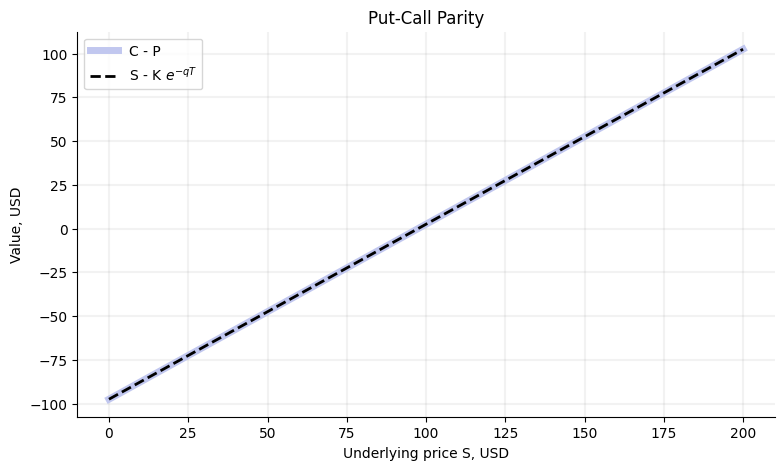

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp
from statistics import NormalDist

# Parámetros
S0 = 100.0; K = 100.0; r = 0.05; q = 0.00; sigma = 0.2; T = 0.5
S = np.linspace(1e-6, 2*K, 600)
N = NormalDist()

def bs_call(S, K, r, q, sigma, T):
    if T <= 0: return np.maximum(S-K,0.0)
    sqrtT = np.sqrt(T)
    d1 = (np.log(S/K) + (r - q + 0.5*sigma**2)*T)/(sigma*sqrtT)
    d2 = d1 - sigma*sqrtT
    cdf = np.vectorize(N.cdf)
    return np.exp(-q*T)*S*cdf(d1) - np.exp(-r*T)*K*cdf(d2)

def bs_put(S, K, r, q, sigma, T):
    if T <= 0: return np.maximum(K-S,0.0)
    sqrtT = np.sqrt(T)
    d1 = (np.log(S/K) + (r - q + 0.5*sigma**2)*T)/(sigma*sqrtT)
    d2 = d1 - sigma*sqrtT
    cdf = np.vectorize(N.cdf)
    return np.exp(-r*T)*K*cdf(-d2) - np.exp(-q*T)*S*cdf(-d1)

C = bs_call(S,K,r,q,sigma,T)
P = bs_put(S,K,r,q,sigma,T)
rhs = S - np.exp(-r*T)*K*np.exp(-q*T*0)  
rhs_q = np.exp(-q*T)*S - np.exp(-r*T)*K  


fig, ax = plt.subplots(figsize=(9,5))
ax.plot(S, C-P, color='#c1c7efff', linewidth=5, label='C - P')
ax.plot(S, rhs_q, linewidth=2, color='black', linestyle='--', label='S - K $e^{-qT}$')
ax.set_title('Put-Call Parity')
ax.set_xlabel('Underlying price S, USD')
ax.set_ylabel('Value, USD')

ax.legend()
ax.grid(True, color="grey", linewidth=1.5, linestyle='-', alpha=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Save as PNG ---
fig.savefig("figures/3_put-call_parity.png", dpi=300, bbox_inches="tight", transparent=False)

plt.show()

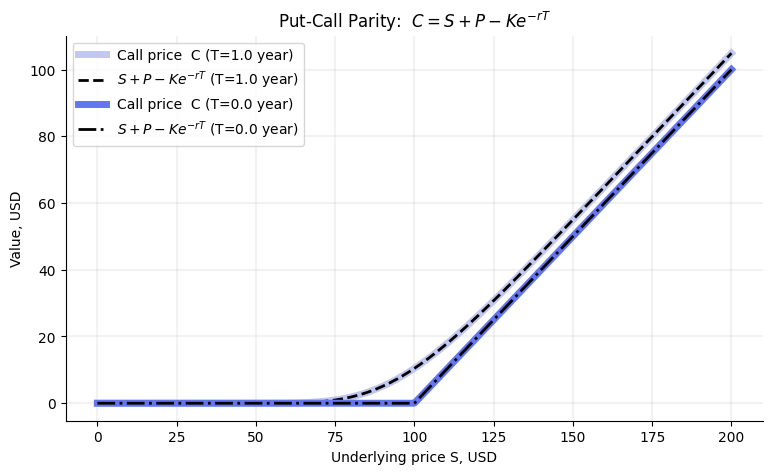

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp
from statistics import NormalDist

# --- Parameters ---
S0 = 100.0
K  = 100.0
r  = 0.05
q  = 0.00     # dividend yield
sigma = 0.2
T1 = 1
T0 = 0

S = np.linspace(1e-6, 2*K, 500)
N = NormalDist()

# --- Black–Scholes formulas ---
def bs_call(S, K, r, q, sigma, T):
    if T <= 0: return np.maximum(S - K, 0.0)
    sqrtT = np.sqrt(T)
    d1 = (np.log(S/K) + (r - q + 0.5*sigma**2)*T)/(sigma*sqrtT)
    d2 = d1 - sigma*sqrtT
    cdf = np.vectorize(N.cdf)
    return np.exp(-q*T)*S*cdf(d1) - np.exp(-r*T)*K*cdf(d2)

def bs_put(S, K, r, q, sigma, T):
    if T <= 0: return np.maximum(K - S, 0.0)
    sqrtT = np.sqrt(T)
    d1 = (np.log(S/K) + (r - q + 0.5*sigma**2)*T)/(sigma*sqrtT)
    d2 = d1 - sigma*sqrtT
    cdf = np.vectorize(N.cdf)
    return np.exp(-r*T)*K*cdf(-d2) - np.exp(-q*T)*S*cdf(-d1)

# --- Compute sides of parity ---
C1 = bs_call(S, K, r, q, sigma, T1)
P1 = bs_put(S, K, r, q, sigma, T1)
PVK1 = np.exp(-r*T1)*K

C0 = bs_call(S, K, r, q, sigma, T0)
P0 = bs_put(S, K, r, q, sigma, T0)
PVK0 = np.exp(-r*T0)*K

rhs1 = np.exp(-q*T1)* S + P1 - PVK1   # RHS of parity
resid = C1 - rhs1                   # residual (should be ~0)
rhs0 = np.exp(-q*T0)* S + P0 - PVK0

# --- Plot 1: equality ---
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(S, C1, color='#c1c7efff', label='Call price  C (T=1.0 year)', linewidth=5)
ax.plot(S, rhs1, '--', color='black', label=r'$S  + P - K e^{-rT} $ (T=1.0 year)', linewidth=2)

ax.plot(S, C0, color='#6376efff', label='Call price  C (T=0.0 year)', linewidth=5)
ax.plot(S, rhs0, '-.', color='black', label=r'$S + P - K e^{-rT} $ (T=0.0 year)', linewidth=2)

ax.set_title('Put-Call Parity:  $C = S + P - K e^{-rT}$')
ax.set_xlabel('Underlying price S, USD')
ax.set_ylabel('Value, USD')

ax.legend()

ax.grid(True, color="grey", linewidth=1.5, linestyle='-', alpha=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Save as PNG ---
fig.savefig("figures/3_put-call_parity_call_price.png", dpi=300, bbox_inches="tight", transparent=False)

plt.show()

____
Formulas
____

In [115]:
import os
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Configure where to save and how to name files
# ---------------------------------------------------
output_dir = "formulas"         
file_prefix = "3_formula_"      

os.makedirs(output_dir, exist_ok=True)

# ---------------------------------------------------
# 2. LaTeX formulas here
# ---------------------------------------------------
formulas = [
    r"\text{Call} - \text{Put} = S - K e^{-rT}",
    r"\text{Call} = \text{Put} + S - K e^{-rT}",
    r"\text{Put} = \text{Call} - S + K e^{-rT}"
]

# ---------------------------------------------------
# 3. Loop over formulas and save each as PNG
# ---------------------------------------------------
for i, formula in enumerate(formulas, start=1):
    fig, ax = plt.subplots(figsize=(6, 0.1))  # adjust size as you like

    ax.axis("off")

    # Wrap the formula with $...$ so matplotlib treats it as math
    ax.text(
        0.5, 0.5,
        f"${formula}$",
        ha="center",
        va="center",
        fontsize=24,
    )

    filename = f"{file_prefix}{i}.png"
    filepath = os.path.join(output_dir, filename)

    fig.savefig(
        filepath,
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.2,
        transparent=True,   # nice for Medium on white/colored backgrounds
    )
    plt.close(fig)

    print(f"Saved: {filepath}")

Saved: formulas/3_formula_1.png
Saved: formulas/3_formula_2.png
Saved: formulas/3_formula_3.png


<h3>4.    Delta hedging, demonstrating how an option can be priced independently by dynamically managing a portfolio of the underlying asset and a risk-free asset.</h3>

____
Graphs or animations
____

<>:31: SyntaxWarning: invalid escape sequence '\D'
<>:31: SyntaxWarning: invalid escape sequence '\D'
/var/folders/jg/qxxd4l517rj259v_s_gwlg980000gn/T/ipykernel_51451/3943946102.py:31: SyntaxWarning: invalid escape sequence '\D'
  ax.text(0.5, y_down-0.1, "$\Delta t$", ha='right', va='center', fontsize=12)
/var/folders/jg/qxxd4l517rj259v_s_gwlg980000gn/T/ipykernel_51451/3943946102.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([x0, x1], [y0, y_up], 'k-', color = 'blue')
/var/folders/jg/qxxd4l517rj259v_s_gwlg980000gn/T/ipykernel_51451/3943946102.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([x0, x1], [y0, y_down], 'k-', color = 'blue')
/var/folders/jg/qxxd4l517rj259v_s_gwlg980000gn/T/ipykernel_51451/3943946102.py:19: UserWarning: color 

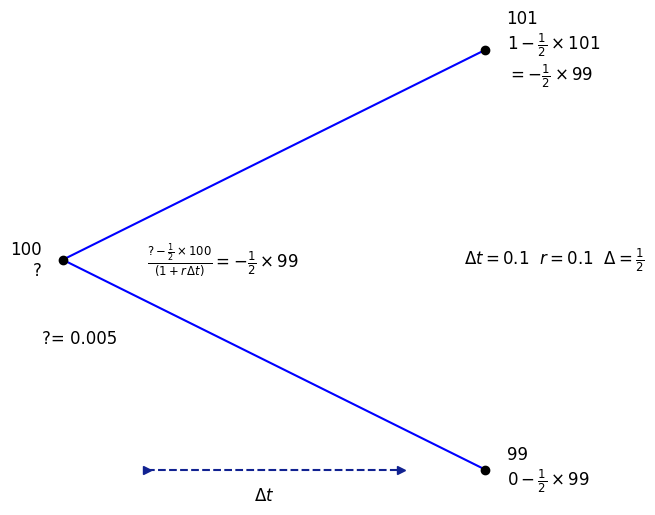

In [ ]:
import matplotlib.pyplot as plt

colors = ["#c1c7efff", "#6376efff", "#112291ff"]

# Node coordinates
x0, y0 = 0, 0          # initial node
x1, y_up = 1, 0.8      # up node
x1, y_down = 1, -0.8   # down node

fig, ax = plt.subplots(figsize=(6, 6))

# Plot edges
ax.plot([x0, x1], [y0, y_up], 'k-', color = 'blue')
ax.plot([x0, x1], [y0, y_down], 'k-', color = 'blue')

ax.plot([0.2, 0.8], [y_down, y_down], linestyle='--', marker='>', color = colors[2])

# Plot nodes
ax.plot(x0, y0, 'ko',color = 'black')
ax.plot(x1, y_up, 'ko',color = 'black')
ax.plot(x1, y_down, 'ko',color = 'black')

# Labels for nodes
ax.text(x0 - 0.05, y0, "100\n?", ha='right', va='center', fontsize=12) 
ax.text(x0 - 0.05, y0-0.3, "?= 0.005", ha='left', va='center', fontsize=12)
ax.text(x1 + 0.05, y_up, "101\n$1 - \\frac{1}{2} \\times 101$\n$= -\\frac{1}{2} \\times 99$", 
        ha='left', va='center', fontsize=12)
ax.text(x1 + 0.05, y_down, "99\n$0 - \\frac{1}{2} \\times 99$", 
        ha='left', va='center', fontsize=12)

ax.text(0.5, y_down-0.1, "$\Delta t$", ha='right', va='center', fontsize=12)

# Base label for the initial node
ax.text(x0 + 0.2, y0, r"$\frac{? - \frac{1}{2} \times 100}{(1 + r\,\Delta t)} = - \frac{1}{2} \times 99 $", 
        ha='left', va='center', fontsize=12)


ax.text(x1 - 0.05, y0, r"$\Delta t = 0.1 \text{  }  r=0.1 \text{  }  \Delta = \frac{1}{2}$", 
        ha='left', va='center', fontsize=12)

# Time arrow
ax.annotate(
    "", xy=(x1, -1.3), xytext=(x0, -1.3),
    arrowprops=dict(arrowstyle="<->", lw=1)
)

# Remove axes
ax.axis('off')

# --- Save as PNG ---
fig.savefig("figures/4_delta_hedge.png", dpi=300, bbox_inches="tight", transparent=False)

plt.show()

____
Formulas
____

In [116]:
import os
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Configure where to save and how to name files
# ---------------------------------------------------
output_dir = "formulas"         
file_prefix = "4_formula_"      

os.makedirs(output_dir, exist_ok=True)

# ---------------------------------------------------
# 2. LaTeX formulas here
# ---------------------------------------------------
formulas = [
    r"\Delta = \frac{f_u - f_d}{S_u - S_d}",
    r"\text{Portfolio value at } t + \Delta t = (1 + r\,\Delta t) \times \text{Portfolio value at } t"
]

# ---------------------------------------------------
# 3. Loop over formulas and save each as PNG
# ---------------------------------------------------
for i, formula in enumerate(formulas, start=1):
    fig, ax = plt.subplots(figsize=(6, 0.1))  # adjust size as you like

    ax.axis("off")

    # Wrap the formula with $...$ so matplotlib treats it as math
    ax.text(
        0.5, 0.5,
        f"${formula}$",
        ha="center",
        va="center",
        fontsize=24,
    )

    filename = f"{file_prefix}{i}.png"
    filepath = os.path.join(output_dir, filename)

    fig.savefig(
        filepath,
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.2,
        transparent=True,   # nice for Medium on white/colored backgrounds
    )
    plt.close(fig)

    print(f"Saved: {filepath}")

Saved: formulas/4_formula_1.png
Saved: formulas/4_formula_2.png


<h3>5.    The binomial tree model — the most intuitive discrete method for option pricing.</h3>

____
Graphs or animations
____

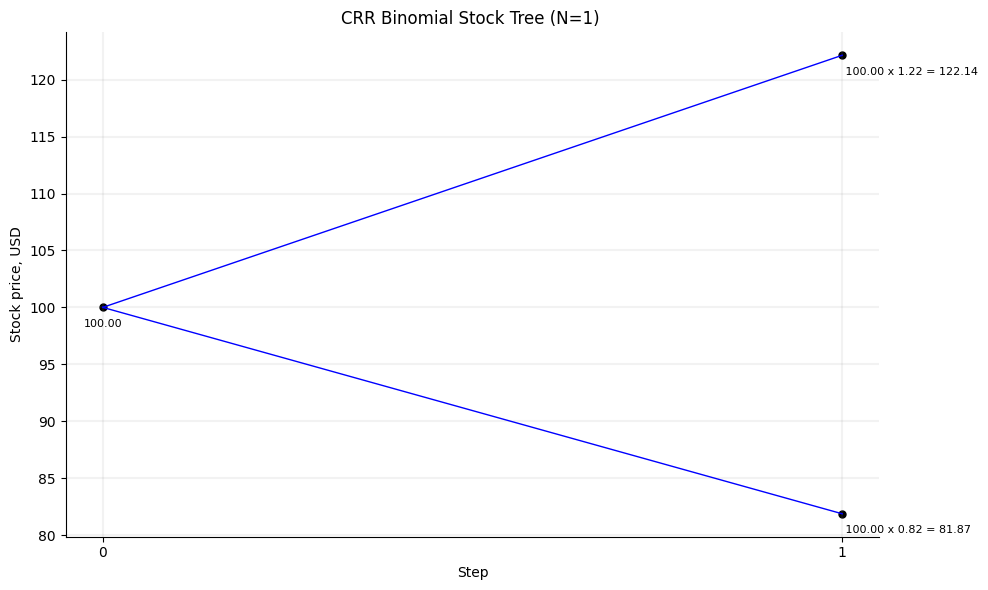

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
S0 = 100.0
K  = 100.0
r  = 0.05
sigma = 0.20
T  = 1.0
N  = 1
option_type = "call"   # "call" or "put"
is_american = False    # True for American, False for European

# --- CRR params ---
dt = T / N
u  = np.exp(sigma * np.sqrt(dt))
d  = 1.0 / u
disc = np.exp(-r * dt)
p = (np.exp(r * dt) - d) / (u - d)

# --- Stock tree ---
# tree_S is not one big rectangular NumPy array.
#It’s a Python list, and each element of that list is a NumPy array of different length.
tree_S = [np.array([S0 * (u**j) * (d**(i-j)) for j in range(i+1)], dtype=float) for i in range(N+1)]

def payoff_fn(S):
    if option_type == "call":
        return np.maximum(S - K, 0.0)
    else:
        return np.maximum(K - S, 0.0)

# --- Option values ---
tree_V = [np.zeros_like(level) for level in tree_S]
tree_V[-1] = payoff_fn(tree_S[-1])

for i in range(N-1, -1, -1):
    continuation = disc * (p * tree_V[i+1][1:] + (1.0 - p) * tree_V[i+1][:-1])
    if is_american:
        exercise = payoff_fn(tree_S[i])
        tree_V[i] = np.maximum(continuation, exercise)
    else:
        tree_V[i] = continuation

price = float(tree_V[0][0])

# --- Plot: tree of S (with option values as labels) ---
fig, ax = plt.subplots(figsize=(10, 6))

# Edges
for i in range(N):
    x0 = np.full(i+1, i)
    y0 = tree_S[i]
    x1 = np.full(i+2, i+1)
    y1 = tree_S[i+1]
    for j in range(i+1):
        ax.plot([x0[j], x1[j]],   [y0[j], y1[j]], color='blue', linewidth=1)
        ax.plot([x0[j], x1[j+1]], [y0[j], y1[j+1]], color='blue', linewidth=1)

# Nodes + labels
for i in range(N):
    x = np.full(i+1, i)
    y = tree_S[i]
    ax.scatter(x, y, s=25, color='black')
    for j in range(i+1):
        ax.text(x[j], y[j], f"\n{tree_S[i][j]:.2f}", ha='center', va='top', fontsize=8)


# Last column (step N): build its own x,y of length N+1
xN = np.full(N+1, N)
yN = tree_S[N]
ax.scatter(xN, yN, s=25, color='black')  # if you also want to draw the nodes
ax.text(xN[0], yN[0], f"\n {S0:.2f} x {d:.2f} = {tree_S[N][0]:.2f}", ha='left', va='top', fontsize=8)
ax.text(xN[1], yN[1], f"\n {S0:.2f} x {u:.2f} = {tree_S[N][1]:.2f}", ha='left', va='top', fontsize=8)




ax.set_title(f'CRR Binomial Stock Tree (N={N}) ')
ax.set_xlabel('Step')
ax.set_ylabel('Stock price, USD')

ax.grid(True, color="grey", linewidth=1.5, linestyle='-', alpha=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks([])                       # remove all default ticks
ax.set_xticks([0, 1])

plt.tight_layout()

# --- Save as PNG ---
fig.savefig("figures/5_binomial_stock_model.png", dpi=300, bbox_inches="tight", transparent=False)

plt.show()

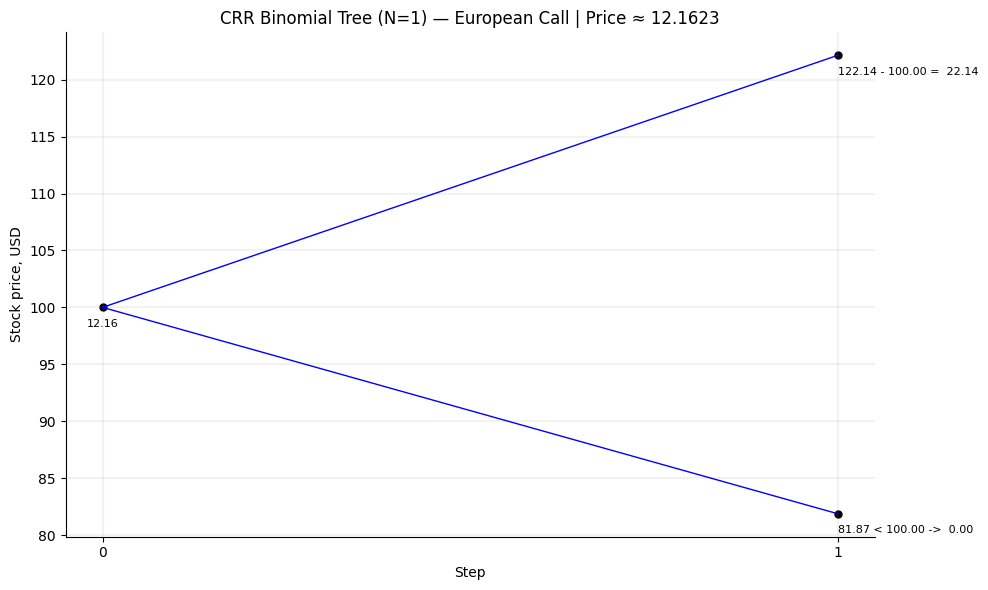

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
S0 = 100.0
K  = 100.0
r  = 0.05
sigma = 0.20
T  = 1.0
N  = 1
option_type = "call"   # "call" or "put"

# --- CRR params ---
dt = T / N
u  = np.exp(sigma * np.sqrt(dt))
d  = 1.0 / u
disc = np.exp(-r * dt)
p = (np.exp(r * dt) - d) / (u - d)

# --- Stock tree ---
# tree_S is not one big rectangular NumPy array.
#It’s a Python list, and each element of that list is a NumPy array of different length.
tree_S = [np.array([S0 * (u**j) * (d**(i-j)) for j in range(i+1)], dtype=float) for i in range(N+1)]

def payoff_fn(S):
    if option_type == "call":
        return np.maximum(S - K, 0.0)
    else:
        return np.maximum(K - S, 0.0)

# --- Option values ---
tree_V = [np.zeros_like(level) for level in tree_S]
tree_V[-1] = payoff_fn(tree_S[-1])

for i in range(N-1, -1, -1):
    continuation = disc * (p * tree_V[i+1][1:] + (1.0 - p) * tree_V[i+1][:-1])
    if is_american:
        exercise = payoff_fn(tree_S[i])
        tree_V[i] = np.maximum(continuation, exercise)
    else:
        tree_V[i] = continuation

price = float(tree_V[0][0])

# --- Plot: tree of S (with option values as labels) ---
fig, ax = plt.subplots(figsize=(10, 6))

# Edges
for i in range(N):
    x0 = np.full(i+1, i)
    y0 = tree_S[i]
    x1 = np.full(i+2, i+1)
    y1 = tree_S[i+1]
    for j in range(i+1):
        ax.plot([x0[j], x1[j]],   [y0[j], y1[j]], color='blue', linewidth=1)
        ax.plot([x0[j], x1[j+1]], [y0[j], y1[j+1]], color='blue', linewidth=1)


for i in range(N):
    x = np.full(i+1, i)
    y = tree_S[i]
    ax.scatter(x, y, s=25, color='black')
    for j in range(i+1):
        ax.text(x[j], y[j], f"\n{tree_V[i][j]:.2f}", ha='center', va='top', fontsize=8)

# Last column (step N): build its own x,y of length N+1
xN = np.full(N+1, N)
yN = tree_S[N]
ax.scatter(xN, yN, s=25, color='black')  # if you also want to draw the nodes
for j in range(N+1):
    if(yN[j] < K):
        ax.text(xN[j], yN[j], f"\n{tree_S[N][j]:.2f} < {K:.2f} ->  {tree_V[N][j]:.2f}", ha='left', va='top', fontsize=8)
    else:
        ax.text(xN[j], yN[j], f"\n{tree_S[N][j]:.2f} - {K:.2f} =  {tree_V[N][j]:.2f}", ha='left', va='top', fontsize=8)



ax.set_title(f'CRR Binomial Tree (N={N}) — European {option_type.capitalize()} | Price ≈ {price:.4f}')
ax.set_xlabel('Step')
ax.set_ylabel('Stock price, USD')

ax.grid(True, color="grey", linewidth=1.5, linestyle='-', alpha=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks([])                       # remove all default ticks
ax.set_xticks([0, 1])

plt.tight_layout()

# --- Save as PNG ---
fig.savefig("figures/5_binomial_tree_european_call.png", dpi=300, bbox_inches="tight", transparent=False)

plt.show()

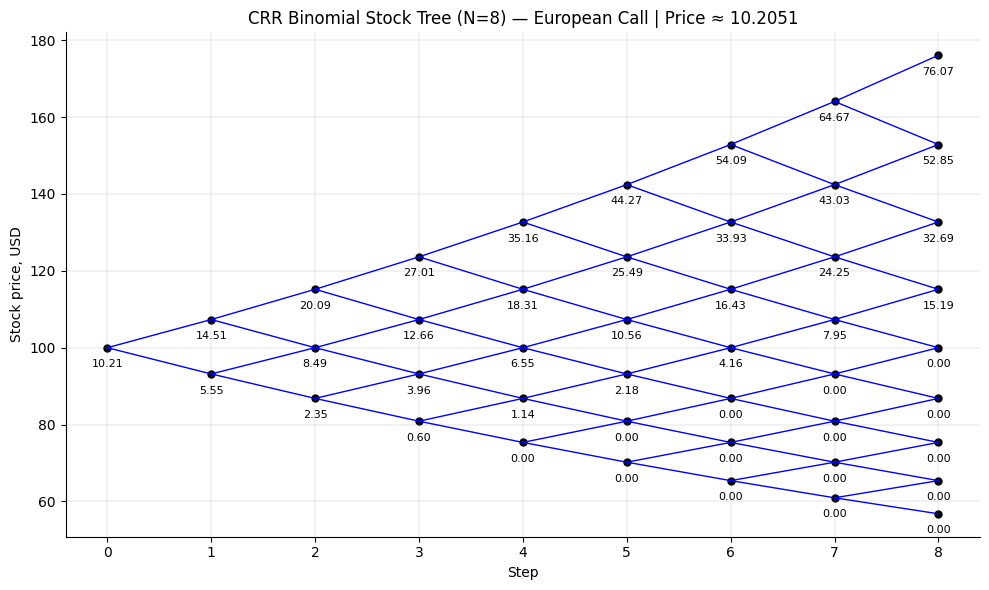

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
S0 = 100.0
K  = 100.0
r  = 0.05
sigma = 0.20
T  = 1.0
N  = 8
option_type = "call"   # "call" or "put"
is_american = False    # True for American, False for European

# --- CRR params ---
dt = T / N
u  = np.exp(sigma * np.sqrt(dt))
d  = 1.0 / u
disc = np.exp(-r * dt)
p = (np.exp(r * dt) - d) / (u - d)

# --- Stock tree ---
# tree_S is not one big rectangular NumPy array.
#It’s a Python list, and each element of that list is a NumPy array of different length.
tree_S = [np.array([S0 * (u**j) * (d**(i-j)) for j in range(i+1)], dtype=float) for i in range(N+1)]

def payoff_fn(S):
    if option_type == "call":
        return np.maximum(S - K, 0.0)
    else:
        return np.maximum(K - S, 0.0)

# --- Option values ---
tree_V = [np.zeros_like(level) for level in tree_S]
tree_V[-1] = payoff_fn(tree_S[-1])

for i in range(N-1, -1, -1):
    continuation = disc * (p * tree_V[i+1][1:] + (1.0 - p) * tree_V[i+1][:-1])
    if is_american:
        exercise = payoff_fn(tree_S[i])
        tree_V[i] = np.maximum(continuation, exercise)
    else:
        tree_V[i] = continuation

price = float(tree_V[0][0])

# --- Plot: tree of S (with option values as labels) ---
fig, ax = plt.subplots(figsize=(10, 6))

# Edges
for i in range(N):
    x0 = np.full(i+1, i)
    y0 = tree_S[i]
    x1 = np.full(i+2, i+1)
    y1 = tree_S[i+1]
    for j in range(i+1):
        ax.plot([x0[j], x1[j]],   [y0[j], y1[j]], color='blue', linewidth=1)
        ax.plot([x0[j], x1[j+1]], [y0[j], y1[j+1]], color='blue', linewidth=1)

# Nodes + labels
for i in range(N+1):
    x = np.full(i+1, i)
    y = tree_S[i]
    ax.scatter(x, y, s=25, color='black')
    for j in range(i+1):
        ax.text(x[j], y[j], f"\n{tree_V[i][j]:.2f}", ha='center', va='top', fontsize=8)




ax.set_title(f'CRR Binomial Stock Tree (N={N}) — {("American" if is_american else "European")} {option_type.capitalize()} | Price ≈ {price:.4f}')
ax.set_xlabel('Step')
ax.set_ylabel('Stock price, USD')

ax.grid(True, color="grey", linewidth=1.5, linestyle='-', alpha=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout()

# --- Save as PNG ---
fig.savefig("figures/5_binomial_tree_european_call_8_layers.png", dpi=300, bbox_inches="tight", transparent=False)

plt.show()

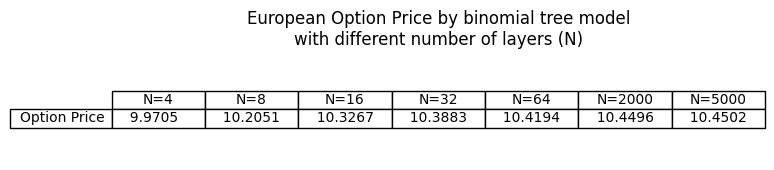

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Common parameters
S0 = 100.0
K  = 100.0
r  = 0.05
sigma = 0.20
T  = 1.0
option_type = "call"   # "call" or "put"

def payoff_fn(S, option_type="call"):
    if option_type == "call":
        return np.maximum(S - K, 0.0)
    else:
        return np.maximum(K - S, 0.0)

def crr_price_and_tree(N, S0=S0, K=K, r=r, sigma=sigma, T=T, option_type=option_type):
    """
    Compute CRR binomial price and (S tree, V tree) for a given N.
    Returns: price, tree_S, tree_V
    """
    dt = T / N
    u  = np.exp(sigma * np.sqrt(dt))
    d  = 1.0 / u
    disc = np.exp(-r * dt)
    p = (np.exp(r * dt) - d) / (u - d)

    # Stock price tree
    tree_S = np.zeros((N + 1, N + 1))
    for i in range(N + 1):          # time step
        for j in range(i + 1):      # number of up moves
            tree_S[i, j] = S0 * (u ** j) * (d ** (i - j))

    # Option value tree
    tree_V = np.zeros_like(tree_S)
    # terminal payoffs
    tree_V[N, :N + 1] = payoff_fn(tree_S[N, :N + 1], option_type)

    # backward induction
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            tree_V[i, j] = disc * (p * tree_V[i + 1, j + 1] +
                                   (1 - p) * tree_V[i + 1, j])

    price = tree_V[0, 0]
    return price, tree_S, tree_V


# Table: prices for different N 
N_list = [4, 8, 16, 32, 64, 2000, 5000]
prices = []

for N in N_list:
    pN, _, _ = crr_price_and_tree(N)
    prices.append(pN)

# Create a table figure with a single row (prices)
fig2, ax2 = plt.subplots(figsize=(8, 1.8))
ax2.axis('off')

cell_text = [[f"{pval:.4f}" for pval in prices]]
row_labels = ["Option Price"]   # Single row label
col_labels = [f"N={N}" for N in N_list]

table = ax2.table(
    cellText=cell_text,
    rowLabels=row_labels,
    colLabels=col_labels,
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# Left-align ALL data cells (not headers)
for (row, col), cell in table.get_celld().items():
    # only data cells: row > 0 (no headers), col >= 0 (no rowLabels)
    if row > 0 and col >= 0:
        cell.get_text().set_ha("left")
        txt = cell.get_text()
        t = txt.get_text()
        if not t.startswith("  "):
            txt.set_text("  " + t)

ax2.set_title(
    "European Option Price by binomial tree model\n"
    "with different number of layers (N)",
    pad=10
)

plt.tight_layout()

# --- Save as PNG ---
# make sure the "figures" directory exists or remove this line
fig2.savefig(
    "figures/5_binomial_tree_european_call_different_number_of_layers.png",
    dpi=300,
    bbox_inches="tight",
    transparent=False
)

plt.show()

____
Code snippets
____

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100.0
K = 100.0
r = 0.05
sigma = 0.20
T = 1.0
N = 8
option_type = "call"  # "call" or "put"

# Risk-neutral parameters
dt = T / N
u = np.exp(sigma * np.sqrt(dt))
d = 1.0 / u
disc = np.exp(-r * dt)
p = (np.exp(r * dt) - d) / (u - d)

# Stock tree (list of NumPy arrays, one per time step)
tree_S = [
    np.array([S0 * (u**j) * (d**(i - j)) for j in range(i + 1)], dtype=float)
    for i in range(N + 1)
]

def payoff_fn(S):
    if option_type == "call":
        return np.maximum(S - K, 0.0)
    else:
        return np.maximum(K - S, 0.0)

# --- Option values ---
tree_V = [np.zeros_like(level) for level in tree_S]
tree_V[-1] = payoff_fn(tree_S[-1])

for i in range(N - 1, -1, -1):
    tree_V[i] = disc * (
        p * tree_V[i + 1][1:] + (1.0 - p) * tree_V[i + 1][:-1]
    )

price = float(tree_V[0][0])

print("Option price:", price)


Option price: 10.205099415991738


____
Formulas
____

In [117]:
import os
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Configure where to save and how to name files
# ---------------------------------------------------
output_dir = "formulas"         
file_prefix = "5_formula_"      

os.makedirs(output_dir, exist_ok=True)

# ---------------------------------------------------
# 2. LaTeX formulas here
# ---------------------------------------------------
formulas = [
    r"S \cdot u \quad \text{or} \quad S \cdot d",
    r"u = e^{\sigma \sqrt{\Delta t}}, \qquad d = e^{-\sigma \sqrt{\Delta t}}",
    r"u d = e^{\sigma \sqrt{\Delta t}}\, e^{-\sigma \sqrt{\Delta t}} = 1",
    r"N = \frac{T}{\Delta t}",
    r"S_{n,k} = S_0\, u^k d^{n-k}",
    r"V = e^{-r \Delta t} \left( p\, V_{\text{up}} + (1 - p)\, V_{\text{down}} \right)",

    r"\Delta = \frac{f_u - f_d}{S u - S d} = \frac{f_u - f_d}{S_0 (u - d)}",
    r"f_u = \Delta S u + B e^{-r \Delta t}",
    r"B = e^{-r \Delta t}\,(f_u - \Delta S u)",
    r"V_0 = \Delta S_0 + B",
    r"V_0 = \Delta S_0 + e^{-r \Delta t}(f_u - \Delta S u)",
    r"V_0 = e^{-r \Delta t}\,[\Delta S_0 e^{r \Delta t} - \Delta S u + f_u ]",
    r"\Delta = \frac{f_u - f_d}{S u - S d}",
    r"V_0 = e^{-r \Delta t} \left[ \frac{f_u - f_d}{S u - S d} S_0 e^{r \Delta t} - \frac{f_u - f_d}{S u - S d} S u + f_u \right]",
    r"V_0 = e^{-r \Delta t} \left[ \frac{f_u - f_d}{S u - S d}\,(S_0 e^{r \Delta t} - S u) + f_u \right]",
    r"V_0 = e^{-r \Delta t} \left[ \frac{S_0 e^{r \Delta t} - S d}{S u - S d} f_u + \frac{S u - S_0 e^{r \Delta t}}{S u - S d} f_d \right]",
    r"p = \frac{S_0 e^{r \Delta t} - S d}{S u - S d}",

    r"p^* = \frac{e^{r\Delta t} - d}{u - d}, \qquad 1 - p^*",
    r"e^{-r\Delta t}\left(p^* S u + (1 - p^*) S d\right) = S",
    r"e^{-rt} S_t \quad \text{is a martingale under }  Q",
    r"V = e^{-r\Delta t}(p^* f_u + (1 - p^*) f_d)"
]

# ---------------------------------------------------
# 3. Loop over formulas and save each as PNG
# ---------------------------------------------------
for i, formula in enumerate(formulas, start=1):
    fig, ax = plt.subplots(figsize=(6, 0.1))  # adjust size as you like

    ax.axis("off")

    # Wrap the formula with $...$ so matplotlib treats it as math
    ax.text(
        0.5, 0.5,
        f"${formula}$",
        ha="center",
        va="center",
        fontsize=24,
    )

    filename = f"{file_prefix}{i}.png"
    filepath = os.path.join(output_dir, filename)

    fig.savefig(
        filepath,
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.2,
        transparent=True,   # nice for Medium on white/colored backgrounds
    )
    plt.close(fig)

    print(f"Saved: {filepath}")

Saved: formulas/5_formula_1.png
Saved: formulas/5_formula_2.png
Saved: formulas/5_formula_3.png
Saved: formulas/5_formula_4.png
Saved: formulas/5_formula_5.png
Saved: formulas/5_formula_6.png
Saved: formulas/5_formula_7.png
Saved: formulas/5_formula_8.png
Saved: formulas/5_formula_9.png
Saved: formulas/5_formula_10.png
Saved: formulas/5_formula_11.png
Saved: formulas/5_formula_12.png
Saved: formulas/5_formula_13.png
Saved: formulas/5_formula_14.png
Saved: formulas/5_formula_15.png
Saved: formulas/5_formula_16.png
Saved: formulas/5_formula_17.png
Saved: formulas/5_formula_18.png
Saved: formulas/5_formula_19.png
Saved: formulas/5_formula_20.png
Saved: formulas/5_formula_21.png


<h3>6.    How the binomial model naturally leads to random walks, Itô’s lemma, and the idea of expressing option value changes through a differential equation.</h3>

____
Formulas
____

In [118]:
import os
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Configure where to save and how to name files
# ---------------------------------------------------
output_dir = "formulas"         
file_prefix = "6_formula_"      

os.makedirs(output_dir, exist_ok=True)

# ---------------------------------------------------
# 2. LaTeX formulas here
# ---------------------------------------------------
formulas = [
    r"\Delta V = V(S + \Delta S,\; t + \Delta t) - V(S,t) \approx  V_S\,\Delta S + V_t\,\Delta t + \frac{1}{2} V_{SS} (\Delta S)^2 +  V_{ST}\,\Delta S\,\Delta t + \frac{1}{2} V_{TT} (\Delta t)^2 +  O\!\left((|\Delta S| + |\Delta t|)^3\right)",
    r"dS = 1 \cdot dt + 1 \cdot dW",
    r"(dS)^2 = (dt + dW)^2 = (dt)^2 + 2\,dt\,dW + (dW)^2",
    r"(dW)^2 = dt, \qquad dt\,dW = 0, \qquad (dt)^2 = 0",
    r"\Delta V \approx V_S\, dS + V_t\, dt + \frac{1}{2} V_{SS} (dS)^2",
    r"dV = V_t\,dt + V_S\, (dt + dW) + \frac{1}{2}V_{SS}\,dt",
    r"dS = \mu S\,dt + \sigma S\,dW",

    r"dX_t = \mu X_t\,dt + \sigma X_t\, dB_t",
    r"Y_t = \log X_t",
    r"f'(x) = \frac{1}{x} \, ; \, f''(x) = -\frac{1}{x^2}",
    r"df(X_t) = f'(X_t)dX_t + \frac{1}{2} f''(X_t)(dX_t)^2",
    r"dX_t = \mu X_t dt + \sigma X_t dB_t",
    r"dY_t = \left(\frac{1}{X_t}\mu X_t + \frac{1}{2} \left(-\frac{1}{X_t^2}\right)\sigma^2 X_t^2\right) dt + \frac{1}{X_t}\sigma X_t dB_t",
    r"dY_t = (\mu - \frac{1}{2}\sigma^2)\,dt + \sigma\, dB_t",
    r"X_t = \exp(\log X_0 + (\mu - \frac{1}{2}\sigma^2)t + \sigma B_t)",
    r"X_t = X_0 \exp((\mu - \frac{1}{2}\sigma^2)t + \sigma B_t)",
    r"X(t) = X \exp((r - \frac{1}{2}\sigma^2)(T - t) + \sigma(B(T) - B(t)))",
    r"\log\left(\frac{X(T)}{X}\right) \sim N((r - \frac{1}{2}\sigma^2)(T - t),\; \sigma^2(T - t))",
    r"Z \sim N(\mu,\sigma^2) \quad\Rightarrow\quad Y = e^Z",
    r"f_Y(y) = \frac{1}{y\sigma\sqrt{2\pi}} \exp\left( -\frac{(\log y - \mu)^2}{2\sigma^2} \right), \qquad y>0",
    r"Z \leftrightarrow f_Z(z), \quad Y = g(Z) = e^Z",
    r"f_Y(y) = f_Z(g^{-1}(y))\left|\frac{d}{dy} g^{-1}(y)\right|",
    r"g^{-1}(y) = \log y, \qquad \left|\frac{d}{dy}\log y\right| = \frac{1}{y}",
    r"f_Y(y) = \frac{1}{y\,\sigma\sqrt{2\pi}} \exp\left(-\frac{(\log y - \mu)^2}{2\sigma^2}\right)",

    r"S_{t+\Delta t} = S_t e^{\sigma \sqrt{\Delta t}\,X_t},\qquad X_t\in\{-1,+1\}",
    r"S_{t} = S_0 \exp\!\left(\sigma \sqrt{\Delta t} \sum_{k=1}^{n} X_k\right)",
    r"\sum_{k=1}^{n} X_k \;\Longrightarrow\; \mathcal{N}(0, t)",
    r"S_t = S_0\, e^{\sigma W_t}",
    r"u = e^{\sigma\sqrt{\Delta t}},\qquad d = e^{-\sigma\sqrt{\Delta t}}",
    r"p^* = \frac{e^{r\Delta t} - d}{u - d},\qquad 1-p^* \text{ for the down move.}",
    r"S_{t+\Delta t} = S_t e^{\sigma \sqrt{\Delta t}\,X_t}",
    r"X_t = +1 \text{ with probability } p^*, \, -1 \text{ with probability } 1 - p^*",
    r"\log S_{t+\Delta t} = \log S_t + \sigma\sqrt{\Delta t}\,X_t",
    r"\Delta \log S = \sigma\sqrt{\Delta t}\,X_t",
    r"E^Q[\Delta\log S] = \sigma\sqrt{\Delta t}\,E^Q[X_t] = \sigma\sqrt{\Delta t}\,(2p^*-1)",
    r"u = e^{\sigma\sqrt{\Delta t}} \approx 1 + \sigma\sqrt{\Delta t} + \frac{1}{2}\sigma^2\Delta t",
    r"d = e^{-\sigma\sqrt{\Delta t}} \approx 1 - \sigma\sqrt{\Delta t} + \frac{1}{2}\sigma^2\Delta t",
    r"e^{r\Delta t} \approx 1 + r\Delta t",
    r"u - d \approx 2\sigma\sqrt{\Delta t}",
    r"e^{r\Delta t} - d \approx (1+r\Delta t) - \left(1 - \sigma\sqrt{\Delta t} + \frac{1}{2}\sigma^2\Delta t\right) \approx \sigma\sqrt{\Delta t} + (r - \frac{1}{2}\sigma^2)\Delta t",
    r"p^* = \frac{e^{r\Delta t} - d}{u-d} \approx \frac{\sigma\sqrt{\Delta t} + (r - \frac{1}{2}\sigma^2)\Delta t}{2\sigma\sqrt{\Delta t}} = \frac{1}{2} + \frac{r - \frac{1}{2}\sigma^2}{2\sigma}\sqrt{\Delta t}",
    r"2p^* - 1 \approx \frac{r - \frac{1}{2}\sigma^2}{\sigma}\sqrt{\Delta t}",
    r"E^Q[\Delta\log S] = \sigma\sqrt{\Delta t}\,(2p^* - 1) \approx \sigma\sqrt{\Delta t}\,\frac{r - \frac{1}{2}\sigma^2}{\sigma}\sqrt{\Delta t} = (r - \frac{1}{2}\sigma^2)\Delta t",
    r"d\log S_t = \left(r - \frac{1}{2}\sigma^2\right)dt + \sigma\,dW_t^{Q}",

    r"S_{t+\Delta t} = S_t\, e^{\,\sigma\sqrt{\Delta t}\,X_t}, \quad X_t \in \{-1,+1\}",
    r"dS = \mu S\,dt + \sigma S\,dW_t",
    r"dS = r S\,dt + \sigma S\,dW_t^{Q}",

]

# ---------------------------------------------------
# 3. Loop over formulas and save each as PNG
# ---------------------------------------------------
for i, formula in enumerate(formulas, start=1):
    fig, ax = plt.subplots(figsize=(6, 0.1))  # adjust size as you like

    ax.axis("off")

    # Wrap the formula with $...$ so matplotlib treats it as math
    ax.text(
        0.5, 0.5,
        f"${formula}$",
        ha="center",
        va="center",
        fontsize=24,
    )

    filename = f"{file_prefix}{i}.png"
    filepath = os.path.join(output_dir, filename)

    fig.savefig(
        filepath,
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.2,
        transparent=True,   # nice for Medium on white/colored backgrounds
    )
    plt.close(fig)

    print(f"Saved: {filepath}")

Saved: formulas/6_formula_1.png
Saved: formulas/6_formula_2.png
Saved: formulas/6_formula_3.png
Saved: formulas/6_formula_4.png
Saved: formulas/6_formula_5.png
Saved: formulas/6_formula_6.png
Saved: formulas/6_formula_7.png
Saved: formulas/6_formula_8.png
Saved: formulas/6_formula_9.png
Saved: formulas/6_formula_10.png
Saved: formulas/6_formula_11.png
Saved: formulas/6_formula_12.png
Saved: formulas/6_formula_13.png
Saved: formulas/6_formula_14.png
Saved: formulas/6_formula_15.png
Saved: formulas/6_formula_16.png
Saved: formulas/6_formula_17.png
Saved: formulas/6_formula_18.png
Saved: formulas/6_formula_19.png
Saved: formulas/6_formula_20.png
Saved: formulas/6_formula_21.png
Saved: formulas/6_formula_22.png
Saved: formulas/6_formula_23.png
Saved: formulas/6_formula_24.png
Saved: formulas/6_formula_25.png
Saved: formulas/6_formula_26.png
Saved: formulas/6_formula_27.png
Saved: formulas/6_formula_28.png
Saved: formulas/6_formula_29.png
Saved: formulas/6_formula_30.png
Saved: formulas/6_f

<h3>7.    The derivation of the Black–Scholes PDE, including continuous hedging, risk neutrality, and their implications.</h3>

____
Graphs or animations
____

____
Formulas
____

In [119]:
import os
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Configure where to save and how to name files
# ---------------------------------------------------
output_dir = "formulas"         
file_prefix = "7_formula_"      

os.makedirs(output_dir, exist_ok=True)

# ---------------------------------------------------
# 2. LaTeX formulas here
# ---------------------------------------------------
formulas = [
    r"dV = V_t\,dt + V_S\,dS + \frac{1}{2} V_{SS}(dS)^2 = V_t\,dt + V_S(\mu S\,dt + \sigma S\,dW_t) + \frac{1}{2} V_{SS}\sigma^2 S^2\,dt",
    r"dV = (V_t + \mu S V_S + \frac{1}{2} \sigma^2 S^2 V_{SS})\,dt + \sigma S V_S\,dW_t",
    r"\Pi = V - \Delta S",
    r"d\Pi = dV - \Delta\,dS",
    r"d\Pi = (V_t + \mu S V_S + \frac{1}{2} \sigma^2 S^2 V_{SS}) \, dt + \sigma S V_S \, dW_t - \Delta(\mu S\,dt + \sigma S \, dW_t) = (V_t + \mu S V_S + \frac{1}{2} \sigma^2 S^2 V_{SS} - \Delta \mu S) \, dt + \sigma S (V_S - \Delta) \, dW_t",
    r"V_S - \Delta = 0 \quad\Longrightarrow\quad \Delta = V_S",
    r"d\Pi = (V_t + \frac{1}{2} \sigma^2 S^2 V_{SS})\,dt",
    r"\Pi = V - V_S S",
    r"d\Pi = r\,\Pi\,dt = r\,(V - S V_S)\,dt",
    r"d\Pi = (V_t + \frac{1}{2} \sigma^2 S^2 V_{SS})\,dt",
    r"V_t + \frac{1}{2} \sigma^2 S^2 V_{SS} = r\,(V - S V_S)",
    r"V_t + \frac{1}{2} \sigma^2 S^2 V_{SS} + r S V_S - r V = 0",
   
  

]

# ---------------------------------------------------
# 3. Loop over formulas and save each as PNG
# ---------------------------------------------------
for i, formula in enumerate(formulas, start=1):
    fig, ax = plt.subplots(figsize=(6, 0.1))  # adjust size as you like

    ax.axis("off")

    # Wrap the formula with $...$ so matplotlib treats it as math
    ax.text(
        0.5, 0.5,
        f"${formula}$",
        ha="center",
        va="center",
        fontsize=24,
    )

    filename = f"{file_prefix}{i}.png"
    filepath = os.path.join(output_dir, filename)

    fig.savefig(
        filepath,
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.2,
        transparent=True,   # nice for Medium on white/colored backgrounds
    )
    plt.close(fig)

    print(f"Saved: {filepath}")

Saved: formulas/7_formula_1.png
Saved: formulas/7_formula_2.png
Saved: formulas/7_formula_3.png
Saved: formulas/7_formula_4.png
Saved: formulas/7_formula_5.png
Saved: formulas/7_formula_6.png
Saved: formulas/7_formula_7.png
Saved: formulas/7_formula_8.png
Saved: formulas/7_formula_9.png
Saved: formulas/7_formula_10.png
Saved: formulas/7_formula_11.png
Saved: formulas/7_formula_12.png


<h3>8.    A brief introduction to other PDEs — Laplace, Poisson, and heat equations — to build intuition for diffusion and its economic interpretation.</h3>

____
Formulas
____

In [124]:
import os
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Configure where to save and how to name files
# ---------------------------------------------------
output_dir = "formulas"         
file_prefix = "8_formula_"      

os.makedirs(output_dir, exist_ok=True)

# ---------------------------------------------------
# 2. LaTeX formulas here
# ---------------------------------------------------
formulas = [
    r"p_i = \frac{1}{2} p_{i+1} + \frac{1}{2} p_{i-1},\quad p_0 = 0,\quad p_N = 1,\quad N = L/\Delta x",
    r"p_{i+1} - 2p_i + p_{i-1} = 0",
    r"u(x \pm \Delta x) = u(x) \pm \Delta x\, u_x(x) + \frac{1}{2} (\Delta x)^2 u_{xx}(x) + O((\Delta x)^3)",
    r"u(x) = \frac{1}{2} (u(x+\Delta x) + u(x-\Delta x))",
    r"u(x) = u(x) + \frac{1}{2} (\Delta x)^2 u_{xx}(x) + O((\Delta x)^4)",
    r"u_{xx}(x) = 0",
    r"u(x) = \frac{x}{L}",
    r"p_{i+1} - 2p_i + p_{i-1} = 0",
    r"T\,\mathbf{u} = \mathbf{b}",
    r"\mathbf{u} = (u_1, \ldots, u_{N-1})^\top",
   
  

]

# ---------------------------------------------------
# 3. Loop over formulas and save each as PNG
# ---------------------------------------------------
for i, formula in enumerate(formulas, start=1):
    fig, ax = plt.subplots(figsize=(6, 0.1))  # adjust size as you like

    ax.axis("off")

    # Wrap the formula with $...$ so matplotlib treats it as math
    ax.text(
        0.5, 0.5,
        f"${formula}$",
        ha="center",
        va="center",
        fontsize=24,
    )

    filename = f"{file_prefix}{i}.png"
    filepath = os.path.join(output_dir, filename)

    fig.savefig(
        filepath,
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.2,
        transparent=True,   # nice for Medium on white/colored backgrounds
    )
    plt.close(fig)

    print(f"Saved: {filepath}")

Saved: formulas/8_formula_1.png
Saved: formulas/8_formula_2.png
Saved: formulas/8_formula_3.png
Saved: formulas/8_formula_4.png
Saved: formulas/8_formula_5.png
Saved: formulas/8_formula_6.png
Saved: formulas/8_formula_7.png
Saved: formulas/8_formula_8.png
Saved: formulas/8_formula_9.png
Saved: formulas/8_formula_10.png


In [125]:
# I had persistent issues rendering matrices directly with Matplotlib's mathtext
# and usetex, so here I switched to calling LaTeX + dvipng explicitly.
# This is more robust and works for any formula (including big matrices).

import os
import subprocess

output_dir = "formulas"
file_prefix = "8_formula_"
os.makedirs(output_dir, exist_ok=True)

formulas = [
    r"""
    T =
    \begin{pmatrix}
    -2 & 1 & 0 & \cdots & 0 \\
    1 & -2 & 1 & \cdots & 0 \\
    0 & 1 & -2 & \ddots & 0 \\
    \vdots & \vdots & \ddots & \ddots & 1 \\
    0 & 0 & 0 & 1 & -2
    \end{pmatrix}
    """,
    r"\mathbf{b} = -(u_0,\ 0,\ \ldots,\ 0,\ u_N)^\top"
]


def render_formula_to_png(formula, png_path, tex_name):
    tex_lines = [
        r"\documentclass[border=2pt]{standalone}",
        r"\usepackage{amsmath}",
        r"\begin{document}",
        f"${formula}$",
        r"\end{document}",
    ]
    tex_source = "\n".join(tex_lines)

    tex_file = tex_name + ".tex"

    # Write TeX
    with open(tex_file, "w") as f:
        f.write(tex_source)

    # Compile LaTeX → PDF
    subprocess.run(
        ["pdflatex", "-interaction=nonstopmode", tex_file],
        text=True,
        capture_output=True,
        check=True
    )

    pdf_file = tex_name + ".pdf"

    # Convert PDF → hi-res PNG
    subprocess.run(
        [
            "magick", "-density", "600",
            pdf_file,
            "-quality", "100",
            "-trim",
            png_path
        ],
        text=True,
        capture_output=True,
        check=True
    )

    # Cleanup auxiliary files
    for ext in (".aux", ".log", ".pdf", ".tex"):
        fname = tex_name + ext
        if os.path.exists(fname):
            os.remove(fname)


for i, formula in enumerate(formulas, start=11):
    tex_name = f"tmp_formula_{i}"
    filepath = os.path.join(output_dir, f"{file_prefix}{i}.png")
    render_formula_to_png(formula, filepath, tex_name)
    print("Saved:", filepath)

Saved: formulas/8_formula_11.png
Saved: formulas/8_formula_12.png


In [126]:
import os
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Configure where to save and how to name files
# ---------------------------------------------------
output_dir = "formulas"         
file_prefix = "8_formula_"      

os.makedirs(output_dir, exist_ok=True)

# ---------------------------------------------------
# 2. LaTeX formulas here
# ---------------------------------------------------
formulas = [
    r"p\,u_{i+1} - u_i + q\, u_{i-1} = 0",
    r"A\, \mathbf{u} = \mathbf{b}",
   
  

]

# ---------------------------------------------------
# 3. Loop over formulas and save each as PNG
# ---------------------------------------------------
for i, formula in enumerate(formulas, start=13):
    fig, ax = plt.subplots(figsize=(6, 0.1))  # adjust size as you like

    ax.axis("off")

    # Wrap the formula with $...$ so matplotlib treats it as math
    ax.text(
        0.5, 0.5,
        f"${formula}$",
        ha="center",
        va="center",
        fontsize=24,
    )

    filename = f"{file_prefix}{i}.png"
    filepath = os.path.join(output_dir, filename)

    fig.savefig(
        filepath,
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.2,
        transparent=True,   # nice for Medium on white/colored backgrounds
    )
    plt.close(fig)

    print(f"Saved: {filepath}")

Saved: formulas/8_formula_13.png
Saved: formulas/8_formula_14.png


In [128]:
# I had persistent issues rendering matrices directly with Matplotlib's mathtext
# and usetex, so here I switched to calling LaTeX + dvipng explicitly.
# This is more robust and works for any formula (including big matrices).

import os
import subprocess

output_dir = "formulas"
file_prefix = "8_formula_"
os.makedirs(output_dir, exist_ok=True)

formulas = [
    r"""
    A = \begin{pmatrix} -1 & p & & & 0 \\ q & -1 & p & & \vdots \\ & \ddots & \ddots & \ddots & \\ 0 & \cdots & q & -1 & p \\ 0 & \cdots & & q & -1 \end{pmatrix}
    """,
]


def render_formula_to_png(formula, png_path, tex_name):
    tex_lines = [
        r"\documentclass[border=2pt]{standalone}",
        r"\usepackage{amsmath}",
        r"\begin{document}",
        f"${formula}$",
        r"\end{document}",
    ]
    tex_source = "\n".join(tex_lines)

    tex_file = tex_name + ".tex"

    # Write TeX
    with open(tex_file, "w") as f:
        f.write(tex_source)

    # Compile LaTeX → PDF
    subprocess.run(
        ["pdflatex", "-interaction=nonstopmode", tex_file],
        text=True,
        capture_output=True,
        check=True
    )

    pdf_file = tex_name + ".pdf"

    # Convert PDF → hi-res PNG
    subprocess.run(
        [
            "magick", "-density", "600",
            pdf_file,
            "-quality", "100",
            "-trim",
            png_path
        ],
        text=True,
        capture_output=True,
        check=True
    )

    # Cleanup auxiliary files
    for ext in (".aux", ".log", ".pdf", ".tex"):
        fname = tex_name + ext
        if os.path.exists(fname):
            os.remove(fname)


for i, formula in enumerate(formulas, start=15):
    tex_name = f"tmp_formula_{i}"
    filepath = os.path.join(output_dir, f"{file_prefix}{i}.png")
    render_formula_to_png(formula, filepath, tex_name)
    print("Saved:", filepath)

Saved: formulas/8_formula_15.png


In [137]:
import os
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Configure where to save and how to name files
# ---------------------------------------------------
output_dir = "formulas"         
file_prefix = "8_formula_"      

os.makedirs(output_dir, exist_ok=True)

# ---------------------------------------------------
# 2. LaTeX formulas here
# ---------------------------------------------------
formulas = [
    r"u_i = \frac{1 - (q/p)^i}{1 - (q/p)^N}",
    r"t_i = \Delta t + \tfrac12 t_{i+1} + \tfrac12 t_{i-1}, \quad t_0 = t_N = 0",
    r"t_{i+1} - 2t_i + t_{i-1} = -2\Delta t",
    r"u(x_i) = t_i",
    r"u(x+\Delta x) - 2u(x) + u(x-\Delta x) = (\Delta x)^2 u_{xx}(x) + O((\Delta x)^4)",
    r"(\Delta x)^2 u_{xx} = -2\Delta t",
    r"D := \frac{(\Delta x)^2}{2\Delta t}",
    r"u_{xx} = -\frac{1}{D}",
    r"u(0) = u(L) = 0",
    r"u(x) = \frac{1}{2D} x(L - x)",
    r"\frac{u_{i+1} - 2u_i + u_{i-1}}{(\Delta x)^2} = -\frac{1}{D}",
    r" T \,\mathbf{u} = \mathbf{c}, \quad \mathbf{c} = -\frac{\Delta x^2}{D}\, \mathbf{1}",

    r"u^{n+1}_i = \frac12 \left(u^n_{i+1} + u^n_{i-1}\right)",
    r"\frac{u^{n+1}_i - u^n_i}{\Delta t} = \frac{(\Delta x)^2}{2\Delta t} \cdot \frac{u^n_{i+1} - 2u^n_i + u^n_{i-1}}{(\Delta x)^2}",
    r"D=\frac{(\Delta x)^2}{2\Delta t}",
    r"u_t = D\, u_{xx}",
    r"\mathcal{F}(u_{xx}) = -(k^2)\hat{u}",
    r"\frac{d\hat{u}}{dt} = -D k^2 \hat{u}",
    r"\hat{u}(k,t) = e^{-D k^2 t} \hat{u}(k,0)",
    r"u(x,t) = \big(G_t * u_0\big)(x) = \int_{-\infty}^{\infty} G_t(x-\xi)\,u_0(\xi)\,d\xi",
    r"G_t(x) =\frac{1}{\sqrt{4\pi D t}} \exp\!\left(-\frac{x^2}{4Dt}\right)",
    r"G_t(x) \to \delta(x)",
    r"u(x,0) = (G_0 * u_0)(x) = u_0(x)",

    
  

]

# ---------------------------------------------------
# 3. Loop over formulas and save each as PNG
# ---------------------------------------------------
for i, formula in enumerate(formulas, start=16):
    fig, ax = plt.subplots(figsize=(6, 0.1))  # adjust size as you like

    ax.axis("off")

    # Wrap the formula with $...$ so matplotlib treats it as math
    ax.text(
        0.5, 0.5,
        f"${formula}$",
        ha="center",
        va="center",
        fontsize=24,
    )

    filename = f"{file_prefix}{i}.png"
    filepath = os.path.join(output_dir, filename)

    fig.savefig(
        filepath,
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.2,
        transparent=True,   # nice for Medium on white/colored backgrounds
    )
    plt.close(fig)

    print(f"Saved: {filepath}")

Saved: formulas/8_formula_16.png
Saved: formulas/8_formula_17.png
Saved: formulas/8_formula_18.png
Saved: formulas/8_formula_19.png
Saved: formulas/8_formula_20.png
Saved: formulas/8_formula_21.png
Saved: formulas/8_formula_22.png
Saved: formulas/8_formula_23.png
Saved: formulas/8_formula_24.png
Saved: formulas/8_formula_25.png
Saved: formulas/8_formula_26.png
Saved: formulas/8_formula_27.png
Saved: formulas/8_formula_28.png
Saved: formulas/8_formula_29.png
Saved: formulas/8_formula_30.png
Saved: formulas/8_formula_31.png
Saved: formulas/8_formula_32.png
Saved: formulas/8_formula_33.png
Saved: formulas/8_formula_34.png
Saved: formulas/8_formula_35.png
Saved: formulas/8_formula_36.png
Saved: formulas/8_formula_37.png
Saved: formulas/8_formula_38.png


<h3>9.    How the Black–Scholes PDE is actually a transformed heat equation, and how reversing the transformation gives an elegant convolution-based solution.</h3>

____
Formulas
____

In [ ]:
import os
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Configure where to save and how to name files
# ---------------------------------------------------
output_dir = "formulas"         
file_prefix = "9_formula_"      

os.makedirs(output_dir, exist_ok=True)

# ---------------------------------------------------
# 2. LaTeX formulas here
# ---------------------------------------------------
formulas = [
    r"\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 V_{SS} + r S V_S - rV = 0 ",
    r"V(S,t) = e^{-r(T-t)} U(S,t)",
    r"V_t = e^{-r(T-t)}\left(U_t + rU\right),\qquad V_S = e^{-r(T-t)} U_S,\qquad V_{SS} = e^{-r(T-t)} U_{SS}",
    r"U_t + \tfrac12\sigma^2 S^2 U_{SS} + rS U_S = 0",
    r"\tau = T - t",
    r"U(S,t)=U(S,\tau)",
    r"U_t = -U_\tau",
    r"U_\tau = \tfrac12\sigma^2 S^2 U_{SS} + rS U_S",
    r"\xi = \log S",
    r"\frac{\partial U}{\partial S} = \frac{1}{S} U_\xi, \qquad \frac{\partial^2 U}{\partial S^2} = \frac{1}{S^2}\left(U_{\xi\xi} - U_\xi\right)",
    r"U_\tau = \tfrac12\sigma^2 (U_{\xi\xi} - U_\xi) + r U_\xi",
    r"U_\tau = \tfrac12 \sigma^2 U_{\xi\xi} + (r - \tfrac12\sigma^2)U_\xi",

    r"x = \xi + (r - \tfrac12 \sigma^2)\tau",
    r"U(\xi,\tau) = W(x,\tau)",
    r"U_\tau = W_\tau + (r - \tfrac12\sigma^2)W_x, \qquad U_\xi = W_x, \qquad U_{\xi\xi}=W_{xx}",
    r"W_\tau + (r - \tfrac12\sigma^2) W_x = \tfrac12\sigma^2 W_{xx} + (r - \tfrac12\sigma^2)W_x",
    r"W_\tau = \tfrac12\sigma^2\, W_{xx}",
    r"W(x,0) = \Phi(e^{\xi}) = \phi(x)",
    r"W(x,\tau) = \int_{-\infty}^{\infty} G(x,\tau;\xi)\,\phi(\xi)\,d\xi",
    r"G(x,\tau;\xi) = \frac{1}{\sqrt{2\pi \sigma^2 \tau}} \exp\!\left( -\frac{(x-\xi)^2}{2\sigma^2\tau} \right), \qquad \tau>0",
    r"V(S,t) = e^{-r(T-t)}\,W(x,\tau), \qquad x=\log S+(r-\tfrac12\sigma^2)(T-t)",

    r"x = \,\xi + (r - \tfrac12 \sigma^2)\tau",
    r"d\xi_t = \left(r - \tfrac12\sigma^2\right) dt + \sigma\, dW_t",
    r"r - \tfrac12\sigma^2",
  


    
  

]

# ---------------------------------------------------
# 3. Loop over formulas and save each as PNG
# ---------------------------------------------------
for i, formula in enumerate(formulas, start=1):
    fig, ax = plt.subplots(figsize=(6, 0.1))  # adjust size as you like

    ax.axis("off")

    # Wrap the formula with $...$ so matplotlib treats it as math
    ax.text(
        0.5, 0.5,
        f"${formula}$",
        ha="center",
        va="center",
        fontsize=24,
    )

    filename = f"{file_prefix}{i}.png"
    filepath = os.path.join(output_dir, filename)

    fig.savefig(
        filepath,
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.2,
        transparent=True,   # nice for Medium on white/colored backgrounds
    )
    plt.close(fig)

    print(f"Saved: {filepath}")

Saved: formulas/9_formula_1.png
Saved: formulas/9_formula_2.png
Saved: formulas/9_formula_3.png
Saved: formulas/9_formula_4.png
Saved: formulas/9_formula_5.png
Saved: formulas/9_formula_6.png
Saved: formulas/9_formula_7.png
Saved: formulas/9_formula_8.png
Saved: formulas/9_formula_9.png
Saved: formulas/9_formula_10.png
Saved: formulas/9_formula_11.png
Saved: formulas/9_formula_12.png
Saved: formulas/9_formula_13.png
Saved: formulas/9_formula_14.png
Saved: formulas/9_formula_15.png
Saved: formulas/9_formula_16.png
Saved: formulas/9_formula_17.png
Saved: formulas/9_formula_18.png
Saved: formulas/9_formula_19.png
Saved: formulas/9_formula_20.png
Saved: formulas/9_formula_21.png
Saved: formulas/9_formula_22.png
Saved: formulas/9_formula_23.png
Saved: formulas/9_formula_24.png
Saved: formulas/9_formula_25.png


<h3>10.    The closed-form Black–Scholes formula, derived step by step.</h3>

____
Graphs or animations
____

/var/folders/jg/qxxd4l517rj259v_s_gwlg980000gn/T/ipykernel_51451/1806939906.py:277: UserWarning: frames=<generator object frame_sequence at 0x117572340> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(fig, update, frames=frame_sequence(), init_func=init, blit=True, interval=10)


Saved: convolution_logic


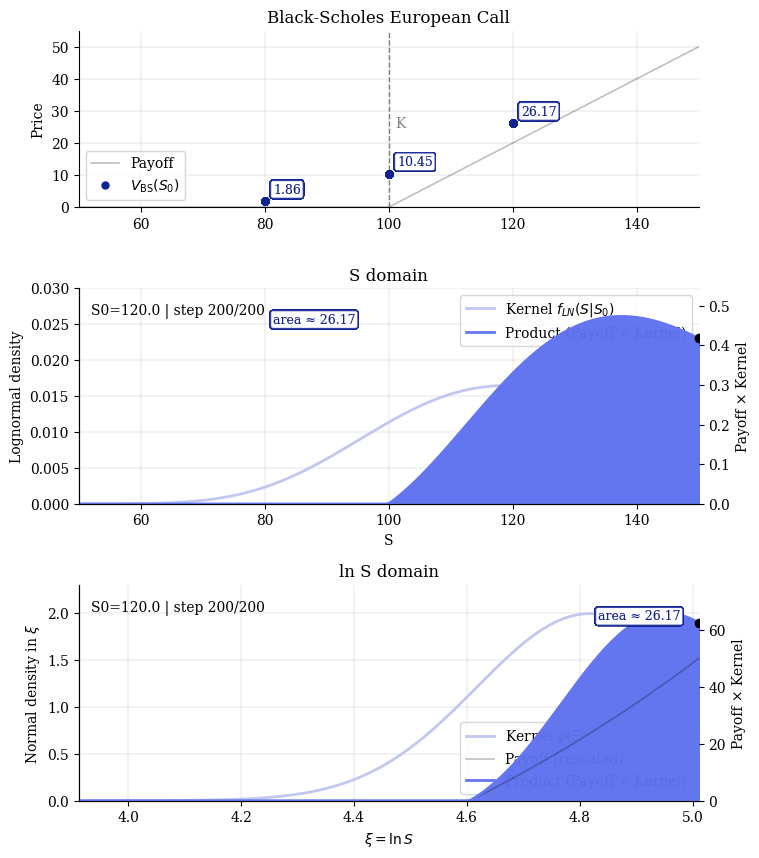

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.gridspec import GridSpec
from scipy.stats import norm

plt.rcParams["text.usetex"] = False

# ====================================== Black–Scholes parameters 
K = 100.0
S = np.linspace(50, 150, 200)            # integration mesh S' (uniform in S)
r = 0.05
sigma = 0.20
tau = 1.00
disc = np.exp(-r * tau)
S0_path = np.linspace(80, 120, 3)

colors = ["#c1c7efff", "#6376efff", "#112291ff"]

# ====================================== Payoff
def payoff(S):
    return np.maximum(S - K, 0.0)

P = payoff(S)
#Pmax = max(P.max(), 1.0)
Pmax = P.max()


# ====================================== Kernels
def lognormal_bs_pdf(Sprime, S0, r, sigma, tau):
    Sprime = np.asarray(Sprime)
    pdf = np.zeros_like(Sprime, dtype=float)
    mask = Sprime > 0
    if sigma <= 0 or tau <= 0:
        return pdf
    mu = np.log(S0) + (r - 0.5 * sigma**2) * tau
    denom = Sprime[mask] * sigma * np.sqrt(2.0 * np.pi * tau)
    z = (np.log(Sprime[mask]) - mu) / (sigma * np.sqrt(tau))
    pdf[mask] = np.exp(-0.5 * z * z) / denom
    return pdf

def normal_pdf(x, m, s):
    z = (x - m) / s
    return np.exp(-0.5 * z * z) / (s * np.sqrt(2*np.pi))

# ====================================== Closed-form Black–Scholes
def bs_call(S0, K, r, sigma, tau):
    if S0 <= 0 or sigma <= 0 or tau <= 0:
        return max(S0 - K, 0.0)
    srt = sigma * np.sqrt(tau)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * tau) / srt
    d2 = d1 - srt
    return S0 * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

# ====================================== logS mesh
x = np.linspace(np.log(S[0]), np.log(S[-1]), len(S))
Phi_x = payoff(np.exp(x))
Phi_x_max = max(Phi_x.max(), 1.0)

# ====================================== Precomputes (for visual purposes only)
# — S domain
F_all = np.array([lognormal_bs_pdf(S, S0, r, sigma, tau) for S0 in S0_path])
I_S_raw = F_all * P[None, :]  # integrand: Payoff(S') * f_LN(S'|S0)

# — logS domain
mu_x = np.array([np.log(S0) + (r - 0.5 * sigma**2) * tau for S0 in S0_path])
sd_x = sigma * np.sqrt(tau)
phi_all = np.array([normal_pdf(x, m, sd_x) for m in mu_x])  #todo es muy logico ya que kernel en si mismo se sentra en m (con logS0) con variable logS
#y  K se aparece solomente cuando hagamos convolucion (inegramos con payoff y alla hay K) ya que en si mismo kernel no esta sujeto de integracion ni conoce K
I_x_raw = phi_all * Phi_x[None, :]  # integrand: Payoff(e^xi) * phi(xi)

# — Closed-form values for selected S0
V_S0_closed = np.array([bs_call(S0, K, r, sigma, tau) for S0 in S0_path])

# ====================================== Figure: top + two panels below
fig = plt.figure(figsize=(8, 10))  # taller, narrower figure fits 3 vertical panels
gs = GridSpec(3, 1, height_ratios=[1.8, 2.2, 2.2], hspace=0.4)

ax_top = fig.add_subplot(gs[0, 0])   # top: closed-form prices
ax_S   = fig.add_subplot(gs[1, 0])   # middle: S domain
ax_X   = fig.add_subplot(gs[2, 0])   # bottom: logS domain

# --- style helper (uniform grid ON only for primary axes) ---
def apply_clean_style(ax, *, grid=True):    #this for not dealing with each plot separately
    if grid:
        ax.grid(True, color="grey", linewidth=1.5, linestyle='-', alpha=0.1)
        ax.set_axisbelow(True)  # grid behind artists
    else:
        ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# ------- Top panel (shows CLOSED values) -------
ax_top.set_xlim(S[0], S[-1])
ax_top.set_ylim(0, max(P.max()*1.1, V_S0_closed.max()*1.15))
ax_top.plot(S, P, color='black', lw=1.2, alpha=0.25, label='Payoff')
ax_top.axvline(K, color='grey', ls='--', lw=1)
ax_top.text(K+1, P.max()*0.5, 'K', color='grey')
ax_top.set_ylabel("Price")
ax_top.set_title("Black-Scholes European Call")
points_done, = ax_top.plot([], [], 'o', ms=5, color=colors[2], label='$V_{\\text{BS}}(S_0)$')
txt_top = ax_top.text(0.02, 0.92, "", transform=ax_top.transAxes) # I don't know why it is here
ax_top.legend(loc='best')
apply_clean_style(ax_top, grid=True)

# ------- Bottom-left: S domain -------
ax_S.set_xlim(S[0], S[-1])
ax_S.set_ylim(0.00, 0.03)  # density scale
ax_S.set_xlabel("S")
ax_S.set_ylabel("Lognormal density")
ax_S.set_title("S domain")

# first right axis: product (secondary, no grid)
ax_S_ax2 = ax_S.twinx()
ax_S_ax2.set_ylabel('Payoff × Kernel')
# scale from product (fixed, no autoscale jitter)
ax_S_ax2.set_ylim(0.00, 1.15 * I_S_raw.max(initial=1e-12))
ax_S_ax2.set_autoscale_on(False)


# dynamic lines (density and partial product)
F_line_S,      = ax_S.plot([], [], lw=2.0, color=colors[0], label='Kernel $f_{LN}(S\'|S_0)$')
Prod_line_S,   = ax_S_ax2.plot([], [], lw=2.0, color=colors[1], label='Product (Payoff × Kernel)')
scan_marker_S, = ax_S_ax2.plot([], [], 'o', color='black', ms=6)
txt_S = ax_S.text(0.02, 0.88, "", transform=ax_S.transAxes)

# ordered legend (Kernel, Payoff, Product)
legend_handles_S = [F_line_S, Prod_line_S]
legend_labels_S  = ['Kernel $f_{LN}(S|S_0)$', 'Product (Payoff × Kernel)']
ax_S.legend(legend_handles_S, legend_labels_S, loc='best')

# uniform grid only on primary; disable on twins
apply_clean_style(ax_S, grid=True)
apply_clean_style(ax_S_ax2, grid=False)
# (ax_S_pay is axis-off)

# ------- Bottom-right: logS domain -------
ax_X.set_xlim(x[0], x[-1])
ax_X.set_ylim(0.00, 2.30) #that's really strange
ax_X.set_xlabel("$\\xi = \\ln S$")
ax_X.set_ylabel("Normal density in $\\xi$")
ax_X.set_title("ln S domain")


ax_X_ax2 = ax_X.twinx()
ax_X_ax2.set_ylabel('Payoff × Kernel')
ax_X_ax2.set_ylim(0.00, 1.15 * I_x_raw.max(initial=1e-12))
ax_X_ax2.set_autoscale_on(False)

# payoff with exponential behavior touch
payoff_line_X, = ax_X_ax2.plot(
    x,
    Phi_x,
    color='black', lw=1.2, alpha=0.25, label='Payoff (rescaled)'
)

phi_line_X,    = ax_X.plot([], [], lw=2.0, color=colors[0], label='Kernel $\\varphi(\\xi)$')
Prod_line_X,   = ax_X_ax2.plot([], [], lw=2.0, color=colors[1], label='Product (Payoff × Kernel)')
scan_marker_X, = ax_X_ax2.plot([], [], 'o', color='black', ms=6)
txt_X = ax_X.text(0.02, 0.88, "", transform=ax_X.transAxes)

# ordered legend (Kernel, Payoff, Product)
legend_handles_X = [phi_line_X, payoff_line_X, Prod_line_X]
legend_labels_X  = ['Kernel $\\varphi(\\xi)$', 'Payoff (rescaled)', 'Product (Payoff × Kernel)']
ax_X.legend(legend_handles_X, legend_labels_X, loc='best')

# uniform grid only on primary; disable on twin
apply_clean_style(ax_X, grid=True)
apply_clean_style(ax_X_ax2, grid=False)

# ====================================== Animation state
done_S0, done_V = [], []
shaded_S, shaded_X = [], []
labels_S, labels_X, labels_top = [], [], []

N_S0, N_S = len(S0_path), len(S)
TOTAL_FRAMES = N_S0 * N_S

def frame_to_indices(f):
    return f // N_S, f % N_S

def init():
    shaded_S.clear(); shaded_X.clear()
    for L in labels_S + labels_X + labels_top:
        try: L.remove()
        except Exception:
            pass
    labels_S.clear(); labels_X.clear(); labels_top.clear()
    points_done.set_data([], [])
    F_line_S.set_data([], []); Prod_line_S.set_data([], []); scan_marker_S.set_data([], [])
    phi_line_X.set_data([], []); Prod_line_X.set_data([], []); scan_marker_X.set_data([], [])
    txt_top.set_text(""); txt_S.set_text(""); txt_X.set_text("")
    return (points_done,
            F_line_S, Prod_line_S, scan_marker_S, txt_S,
            phi_line_X, Prod_line_X, scan_marker_X, txt_X, payoff_line_X)

def update(f):
    i, j = frame_to_indices(f)
    S0 = S0_path[i]

    # clear fills/labels at the start of each S0 path
    if j == 0:
        for poly in shaded_S: poly.remove()
        shaded_S.clear()
        for poly in shaded_X: poly.remove()
        shaded_X.clear()
        for L in labels_S:
            try: L.remove()
            except Exception:
                pass
        labels_S.clear()
        for L in labels_X:
            try: L.remove()
            except Exception:
                pass
        labels_X.clear()

    # ----- Bottom-left: S domain -----
    F_line_S.set_data(S, F_all[i])
    Prod_line_S.set_data(S[:j+1], I_S_raw[i, :j+1])
    scan_marker_S.set_data([S[j]], [I_S_raw[i, j]])
    txt_S.set_text(f"S0={S0:.1f} | step {j+1}/{N_S}")

    # ----- Bottom-right: logS domain -----
    phi_line_X.set_data(x, phi_all[i])
    Prod_line_X.set_data(x[:j+1], I_x_raw[i, :j+1])
    scan_marker_X.set_data([x[j]], [I_x_raw[i, j]])
    txt_X.set_text(f"S0={S0:.1f} | step {j+1}/{N_S}")

    artists = [points_done,
               F_line_S, Prod_line_S, scan_marker_S, txt_S,
               phi_line_X, Prod_line_X, scan_marker_X, txt_X, payoff_line_X, txt_top]

    # End of the S0 path: fill areas and annotate closed-form value
    if j == N_S - 1:
        poly_S = ax_S_ax2.fill_between(S, 0.0, I_S_raw[i, :],
                                       color=colors[1], alpha=0.10, zorder=1)
        shaded_S.append(poly_S)
        Ls = ax_S_ax2.annotate(f"area ≈ {V_S0_closed[i]:.2f}",
                               xy=(S0_path[0], 0.80 * ax_S_ax2.get_ylim()[1]),
                               xytext=(6, 6), textcoords='offset points',
                               fontsize=9, color=colors[2],
                               bbox=dict(boxstyle="round,pad=0.2", fc="white", ec=colors[2], alpha=0.7))
        labels_S.append(Ls)

        poly_X = ax_X_ax2.fill_between(x, 0.0, I_x_raw[i, :],
                                       color=colors[1], alpha=0.10, zorder=1)
        shaded_X.append(poly_X)
        Lx = ax_X_ax2.annotate(f"area ≈ {V_S0_closed[i]:.2f}",
                               xy=(mu_x[i], 0.80 * ax_X_ax2.get_ylim()[1]),
                               xytext=(6, 6), textcoords='offset points',
                               fontsize=9, color=colors[2],
                               bbox=dict(boxstyle="round,pad=0.2", fc="white", ec=colors[2], alpha=0.7))
        labels_X.append(Lx)

        # Top: completed point with CLOSED value
        done_S0.append(S0); done_V.append(V_S0_closed[i])
        points_done.set_data(done_S0, done_V)
        Ltop = ax_top.annotate(f"{V_S0_closed[i]:.2f}",
                               xy=(S0, V_S0_closed[i]),
                               xytext=(6, 6), textcoords='offset points',
                               fontsize=9, color=colors[2],
                               bbox=dict(boxstyle="round,pad=0.2", fc="white", ec=colors[2], alpha=0.7))     
        labels_top.append(Ltop)
        artists.extend([poly_S, Ls, poly_X, Lx, Ltop])

    return artists

def frame_sequence():
    pauses = {len(S)-1: 73}
    for f in range(N_S0 * N_S):
        yield f
        if (f % len(S)) in pauses:
            for _ in range(pauses[f % len(S)]):
                yield f

anim = FuncAnimation(fig, update, frames=frame_sequence(), init_func=init, blit=True, interval=10)
writer = PillowWriter(fps=25)
anim.save("figures/10_convolution_logic.gif", writer=writer, dpi=120)
print("Saved: 12_convolution_logic")

____
Formulas
____

In [147]:
import os
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Configure where to save and how to name files
# ---------------------------------------------------
output_dir = "formulas"         
file_prefix = "10_formula_"      

os.makedirs(output_dir, exist_ok=True)

# ---------------------------------------------------
# 2. LaTeX formulas here
# ---------------------------------------------------
formulas = [
    
    r"dX_t = r X_t\,dt + \sigma X_t\,dW_t",
    r"X(t_1) = X(t_0)\exp\left((r - \frac{1}{2}\sigma^2)(t_1-t_0) + \sigma (W_{t_1}-W_{t_0})\right)",
    r"\log\!\left(\frac{X(t_1)}{X(t_0)}\right) \sim N\left((r - \frac{1}{2}\sigma^2)(t_1-t_0)\,,\ \sigma^2(t_1 - t_0)\right)",
    r"\rho(t_0,t_1; x,y) = \frac{1}{y\,\sigma \sqrt{2\pi(t_1-t_0)}}\, \exp\!\left( -\frac{[\log(y/x) - (r-\frac{1}{2}\sigma^2)(t_1-t_0)]^2}{2\sigma^2(t_1-t_0)} \right)",
    r"C(t) = e^{-r(T-t)}\  \mathbb{E}^{\mathbb{Q}}\!\left[(X_T-K)^+ \mid X_t = x\right]",
    r"e^{-r(T-t)} \int_K^\infty (y-K)\,\rho(t,T; x,y)\,dy",
    r"Z = \frac{\log(y/x) - (r - \frac{1}{2}\sigma^2)(T-t)}{\sigma \sqrt{T - t}} \qquad\Rightarrow\qquad Z \sim N(0,1)",
    r"y = y(z) = x\exp\!\left((r-\frac{1}{2}\sigma^2)(T-t) + \sigma\sqrt{T-t}\,z\right)",
    r"\frac{dy}{dz} = y(z)\,\sigma\sqrt{T-t}",
    r"z_0 = \frac{\log(K/x) - (r-\frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}",
    r"e^{-r(T-t)}\int_{z_0}^\infty (y(z)-K)\,\Phi(z)\,dz",
    r"\Phi(z)=\frac{1}{\sqrt{2\pi}}e^{-z^2/2}",
    r"\int_{z_0}^\infty y(z)\,\Phi(z)\,dz \quad-\quad K\int_{z_0}^\infty \Phi(z)\,dz",
    r"\int_{z_0}^\infty \Phi(z)\,dz = N(-z_0) = N(d_2)",
    r"y(z) = x e^{(r-\frac{1}{2}\sigma^2)(T-t)} e^{\sigma\sqrt{T-t}\,z}",
    r"\int_{z_0}^\infty e^{a z}\Phi(z)\,dz, \qquad a = \sigma\sqrt{T-t}",
    r"\int_{z_0}^\infty e^{az}\Phi(z)\,dz = e^{\frac{1}{2} a^2}\,N(z_0 + a)",
    r"d_1 = z_0 + \sigma\sqrt{T-t} = \frac{\log(x/K) + (r+\frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}",
    r"d_2 = d_1 - \sigma\sqrt{T-t}",
    r"C(t) = x\,N(d_1) - K e^{-r(T-t)} N(d_2)",

    
  

]

# ---------------------------------------------------
# 3. Loop over formulas and save each as PNG
# ---------------------------------------------------
for i, formula in enumerate(formulas, start=1):
    fig, ax = plt.subplots(figsize=(6, 0.1))  # adjust size as you like

    ax.axis("off")

    # Wrap the formula with $...$ so matplotlib treats it as math
    ax.text(
        0.5, 0.5,
        f"${formula}$",
        ha="center",
        va="center",
        fontsize=24,
    )

    filename = f"{file_prefix}{i}.png"
    filepath = os.path.join(output_dir, filename)

    fig.savefig(
        filepath,
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.2,
        transparent=True,   # nice for Medium on white/colored backgrounds
    )
    plt.close(fig)

    print(f"Saved: {filepath}")

Saved: formulas/10_formula_1.png
Saved: formulas/10_formula_2.png
Saved: formulas/10_formula_3.png
Saved: formulas/10_formula_4.png
Saved: formulas/10_formula_5.png
Saved: formulas/10_formula_6.png
Saved: formulas/10_formula_7.png
Saved: formulas/10_formula_8.png
Saved: formulas/10_formula_9.png
Saved: formulas/10_formula_10.png
Saved: formulas/10_formula_11.png
Saved: formulas/10_formula_12.png
Saved: formulas/10_formula_13.png
Saved: formulas/10_formula_14.png
Saved: formulas/10_formula_15.png
Saved: formulas/10_formula_16.png
Saved: formulas/10_formula_17.png
Saved: formulas/10_formula_18.png
Saved: formulas/10_formula_19.png
Saved: formulas/10_formula_20.png


<h3>11.    How this framework extends to other options simply by changing the payoff and reapplying the same logic.</h3>

____
Formulas
____

In [169]:
import os
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Configure where to save and how to name files
# ---------------------------------------------------
output_dir = "formulas"         
file_prefix = "11_formula_"      

os.makedirs(output_dir, exist_ok=True)

# ---------------------------------------------------
# 2. LaTeX formulas here
# ---------------------------------------------------
formulas = [
    
    r" \text{payoff}(S_T) = 1, \text{ when } S_T > K \text{      } \text{payoff}(S_T) = 0,  \text{ when } S_T \leq K",
    r"B(t) = e^{-r(T-t)}\, E^{ Q}[ 1_{\{S_T > K\}} \mid S_t = S] = e^{-r(T-t)}\, \Phi(S_T > K \mid S_t=S)",
    r"\log S_T \sim N(\log S + (r-\frac{1}{2}\sigma^2)(T-t),\ \sigma^2 (T-t))",
    r"d_2 = \frac{\log(S/K) + (r - \frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}",
    r" \Phi(S_T > K) =  \Phi(\log S_T > \log K) =  \Phi\!\left(Z > \frac{\log K - \log S - (r-\frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}\right) = N(d_2)",
    r"B(t) = e^{-r(T-t)} N(d_2)",
    r"B_Q(t) = A\, e^{-r(T-t)} N(d_2)",



    
  

]

# ---------------------------------------------------
# 3. Loop over formulas and save each as PNG
# ---------------------------------------------------
for i, formula in enumerate(formulas, start=1):
    fig, ax = plt.subplots(figsize=(6, 0.1))  # adjust size as you like

    ax.axis("off")

    # Wrap the formula with $...$ so matplotlib treats it as math
    ax.text(
        0.5, 0.5,
        f"${formula}$",
        ha="center",
        va="center",
        fontsize=24,
    )

    filename = f"{file_prefix}{i}.png"
    filepath = os.path.join(output_dir, filename)

    fig.savefig(
        filepath,
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.2,
        transparent=True,   # nice for Medium on white/colored backgrounds
    )
    plt.close(fig)

    print(f"Saved: {filepath}")

Saved: formulas/11_formula_1.png
Saved: formulas/11_formula_2.png
Saved: formulas/11_formula_3.png
Saved: formulas/11_formula_4.png
Saved: formulas/11_formula_5.png
Saved: formulas/11_formula_6.png
Saved: formulas/11_formula_7.png


<h3>12. A visual intuition and intriguing properties on why a call is usually more expensive than a put, and why the call price never falls below its payoff while the put can.</h3>

____
Graphs or animations
____

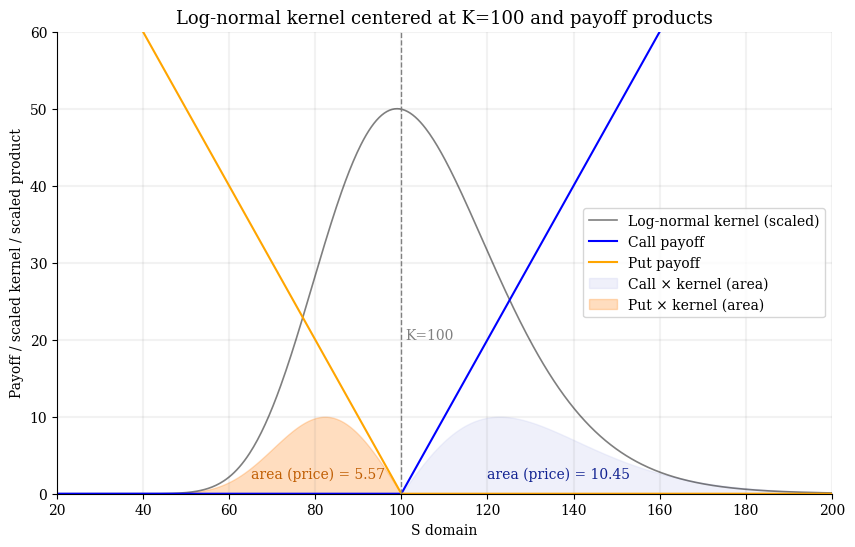

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Parameters
K = 100
S = np.linspace(20, 200, 600)
r, sigma, tau = 0.05, 0.20, 1.0
S0 = K  # center of the log-normal

colors = ["#c1c7efff", "#6376efff", "#112291ff", "#FF7B0060", "#C05E03FF"]

# ====================================== Closed-form Black–Scholes
def bs_call(S0, K, r, sigma, tau):
    if S0 <= 0 or sigma <= 0 or tau <= 0:
        return max(S0 - K, 0.0)
    srt = sigma * np.sqrt(tau)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * tau) / srt
    d2 = d1 - srt
    return S0 * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

def bs_put(S0, K, r, sigma, tau):
    if S0 <= 0 or sigma <= 0 or tau <= 0:
        return max(S0 - K, 0.0)
    srt = sigma * np.sqrt(tau)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * tau) / srt
    d2 = d1 - srt
    return K * np.exp(-r * tau) * norm.cdf(-d2) - S0 * norm.cdf(-d1) 


# Log-normal PDF with mean at K
mu = np.log(S0) + (r - 0.5 * sigma**2) * tau
pdf = lognorm.pdf(S, s=sigma * np.sqrt(tau), scale=np.exp(mu))

# Payoffs
call_payoff = np.maximum(S - K, 0)
put_payoff  = np.maximum(K - S, 0)

# Products (visual comparison only)
call_product = call_payoff * pdf
put_product  = put_payoff  * pdf

# Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Log-normal kernel centered at K=100 and payoff products", fontsize=13)

# Plot kernel (scaled for visibility)
ax.plot(S, pdf / pdf.max() * K/2, color = 'black', lw=1.2, alpha=0.5, label='Log-normal kernel (scaled)')

# Plot payoffs
ax.plot(S, call_payoff, color='blue', lw=1.5, label='Call payoff')
ax.plot(S, put_payoff, color='orange', lw=1.5, label='Put payoff')

# Shade product areas
ax.fill_between(S, 0, call_product / call_product.max() * K/10,
                color=colors[0], alpha=0.25, label='Call × kernel (area)')
ax.fill_between(S, 0, put_product / put_product.max() * K/10,
                color=colors[3], alpha=0.25, label='Put × kernel (area)')

# Add reference line for K
ax.axvline(K, color='grey', lw=1, ls='--')
ax.text(K+1, K*0.20, "K=100", color='grey')

ax.text(K*1.2, K*0.02,f"area (price) = {bs_call(S0, K, r, sigma, tau):.2f}", color=colors[2])
ax.text(K*0.65, K*0.02,f"area (price) = {bs_put(S0, K, r, sigma, tau):.2f}", color=colors[4])

# Styling
ax.set_xlim(20, 200)
ax.set_ylim(0, 60)
ax.set_xlabel("S domain")
ax.set_ylabel("Payoff / scaled kernel / scaled product")
ax.legend(loc='best')
ax.grid(True, color="grey", linewidth=1.5, linestyle='-', alpha=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Save as PNG ---
fig.savefig("figures/12_log_normal_kernel_product.png", dpi=300, bbox_inches="tight", transparent=False)

plt.show()

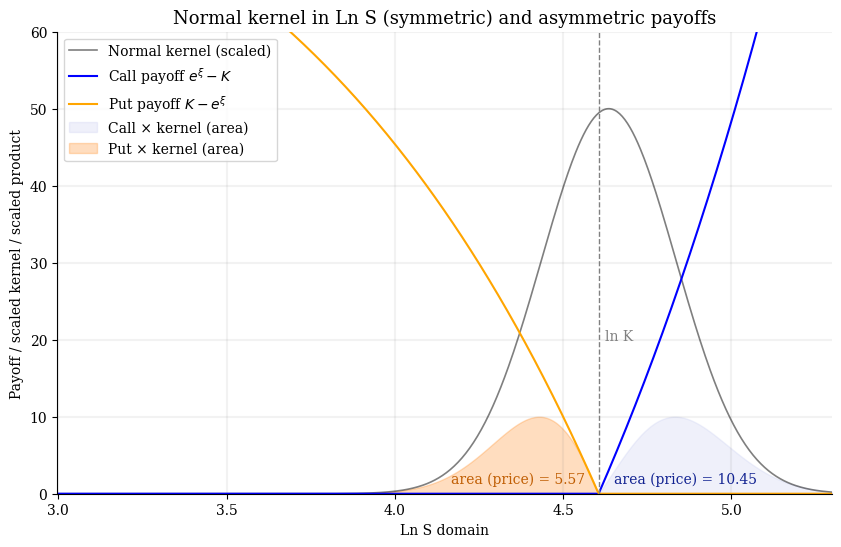

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
K = 100
r, sigma, tau = 0.05, 0.20, 1.0
S0 = K

colors = ["#c1c7efff", "#6376efff", "#112291ff", "#FF7B0060", "#C05E03FF"]

# ====================================== Closed-form Black–Scholes
def bs_call(S0, K, r, sigma, tau):
    if S0 <= 0 or sigma <= 0 or tau <= 0:
        return max(S0 - K, 0.0)
    srt = sigma * np.sqrt(tau)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * tau) / srt
    d2 = d1 - srt
    return S0 * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

def bs_put(S0, K, r, sigma, tau):
    if S0 <= 0 or sigma <= 0 or tau <= 0:
        return max(S0 - K, 0.0)
    srt = sigma * np.sqrt(tau)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * tau) / srt
    d2 = d1 - srt
    return K * np.exp(-r * tau) * norm.cdf(-d2) - S0 * norm.cdf(-d1)


# ----- logS grid -----
x = np.linspace(np.log(20), np.log(200), 600)
S = np.exp(x)

# Normal (Gaussian) kernel in log-space (centered at mu)
mu = np.log(S0) + (r - 0.5 * sigma**2) * tau
sd = sigma * np.sqrt(tau)
pdf_x = norm.pdf(x, mu, sd)

# Payoffs in log-space
call_payoff_x = np.maximum(np.exp(x) - K, 0)
put_payoff_x  = np.maximum(K - np.exp(x), 0)

# Products
call_product_x = call_payoff_x * pdf_x
put_product_x  = put_payoff_x  * pdf_x

# ----- Plot -----
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Normal kernel in Ln S (symmetric) and asymmetric payoffs", fontsize=13)

# Kernel (scaled for visibility)
ax.plot(x, pdf_x / pdf_x.max() * K/2, color = 'black', lw=1.2, alpha=0.5, label='Normal kernel (scaled)')

# Payoffs
ax.plot(x, call_payoff_x, color='blue', lw=1.5, label='Call payoff $e^{\\xi}-K$')
ax.plot(x, put_payoff_x, color='orange', lw=1.5, label='Put payoff $K-e^{\\xi}$')

# Shade product areas (rescaled for visual comparability)
ax.fill_between(x, 0, call_product_x / call_product_x.max() * K/10,
                color=colors[0], alpha=0.25, label='Call × kernel (area)')
ax.fill_between(x, 0, put_product_x / put_product_x.max() * K/10,
                color=colors[3], alpha=0.25, label='Put × kernel (area)')

# Reference lines
ax.axvline(np.log(K), color='grey', lw=1, ls='--')
ax.text(np.log(K)+0.02, K*0.20, "ln K", color='grey')

ax.text(np.log(K)*1.01, np.log(K)*0.3,f"area (price) = {bs_call(S0, K, r, sigma, tau):.2f}", color=colors[2])
ax.text(np.log(K)*0.905, np.log(K)*0.3,f"area (price) = {bs_put(S0, K, r, sigma, tau):.2f}", color=colors[4])

# Styling
ax.set_xlim(np.log(20), np.log(200))
ax.set_ylim(0, 60)
ax.set_xlabel("Ln S domain")
ax.set_ylabel("Payoff / scaled kernel / scaled product")
ax.legend(loc='best')

ax.grid(True, color="grey", linewidth=1.5, linestyle='-', alpha=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Save as PNG ---
fig.savefig("figures/12_normal_kernel_product.png", dpi=300, bbox_inches="tight", transparent=False)

plt.show()

____
Formulas
____